# Non-linear Decision Boundaries - Logistic Regression Solution

Throughout this coding homework assignment, you will work with a well-known dataset in the machine learning field: the Wisconsin breast cancer dataset from the UCI Machine Learning Repository.

First you will be guided through the transition from linear regression on continuous observations to binary label variables. You will see why linear regression is not the best model to use when you try to predict a binary class label.

Second, you will review fundamental concepts of logistic regression presented in the course note and lecture. The emphasis at this time is to visualize properties of the sigmoid function, and you'll have a chance to implement the loss function and decision rule of logistic regression, which you have seen in theory.

Third, you will visualize a simple logistic regression model using only one numerical feature with an intercept. You cannot find optimal weight vectors at this point, but the pedagogical purpose of this part is to take advantage of all functions you implemented in the second part. So you can fully understand how and why logistic regression works, without being introduced to the sklearn library.

Lastly, you will use all features provided in the breast cancer dataset, and build a logistic regression model using the sklearn library. You will get hands on experience in data cleaning, EDA, model training, and evaluation metrics. This will give you enough exposure to functions of sklearn library related to binary classification.

In [ ]:
# import necessary library and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction: From Linear Regresson to Binary Classification

Recall that a regression problem in machine learning is to construct a mapping function, which takes in an argument as a feature vector of a single data point, and ouputs a predicted value based on the input. The purpose of this construction is to approximate outputs as close as possible to the true underlying response variable. So far we have only seen linear models. A model is a linear model if it is a linear combination of features in the feature space. You should remember that there is always a closed form solution to the linear model given features and observations.

We introduced support vector machines (SVM) for classification problems. Now in order to output a prediction of a binary class label, we cannot use traditional linear regression since it outputs continuous predictions. SVM produces a linear decision boundary in feature space, but it works well only when data is linearly separable.

Now, we are curious about the case when data is not linearly separable. Extending from linear models to non-linear decision functions might make our life easier. We further want to suggest a probablistic interpretation of classification problem. Given binary labels 0 and 1, we can simply interpret our prediction as a probability that a given data point takes a value of 1. 

First, we want to [load Wisconsin breast cancer dataset from sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). We start with a model with only one single feature, "mean radius", which is the first column. You will observe how linear regression model performs by visualizing its decision boundary. With this intuition in mind, you will understand why we want to introduce logistic regression today.

In [ ]:
# import breast cancer dataset from sklearn library
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X_simple = pd.DataFrame(dataset.data, columns=dataset.feature_names)[['mean radius']]
y_simple = dataset.target

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y_simple, test_size = 0.2)

In [ ]:
X_simple.head()

,mean radius
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


**Question: Visualize the training set in a 2-D plane. Plot feature `mean radius` on x-axis and response variable `diagnosis` on y-axis.** 

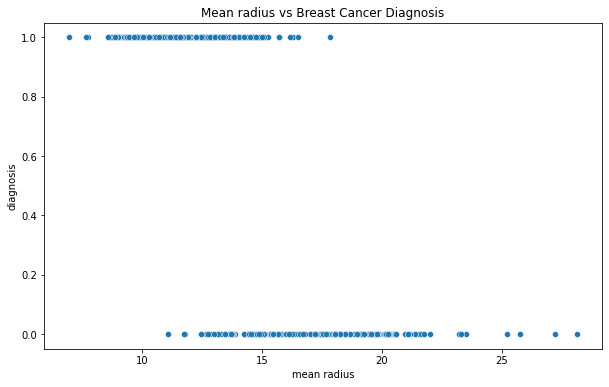

In [ ]:
# visualize training set
plt.figure(figsize=(10, 6))
# TODO: use scatterplot to visualize training set
# SOLUTION:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train)
plt.ylabel('diagnosis')
plt.title('Mean radius vs Breast Cancer Diagnosis');

**Question: Comment on whether we are given linearly separable data. Can you guess what type of model linear regression will output? What will be the decision boundary if we use support vector machines?**

*Solution:*

*A dataset in $d$ dimensional subspace is linearly separable, if we can find a separating hyperplane in $d-1$ deimension. Here we have feature value and label value in $R ^ 2$. We want to find an 1 dimensional vertical line that can perfectly separate training points. We should observe this is impossible, so we don't have linearly separable data.*

*Linear regression model will fit the shape of points as close as possible, so it will output a line going from top left to bottom right.*

*Support vector machine only works on linearly separable data (recall our discussion from two weeks ago). So in this case, hard-margin SVM will fail.*

**Question: Implement the following functions to solve for and visualize ordinay least square linear regression without regularization. `ordinary_least_square` finds the closed form solution for the optimal weight vector in linear regression. `ols_predict` uses weight vector to predict a new test point. `mse` is the mean squared error of linear our regression model on a given dataset.**

In [ ]:
# TODO: solve ordinary least square linear regression solution
# Solution:
def ordinary_least_square(X, y):
  return np.linalg.solve(X.T @ X, X.T @ y)

# TODO: linear regression prediction
# Solution:
def ols_predict(X, w):
  return X @ w

# TODO: compute mean squared error
# Solution: compute mean squared error
def mse(y, y_pred):
  return np.mean((y - y_pred) ** 2)

Now you want to fit a linear regression model to this training set, only using the "mean radius" feature and an extra intercept term. That is, our linear regression model should be in the form:

$$ \hat{y} = \hat{w}x + \hat{b} $$.

Use what you learned from the previous week about linear regression to find a closed form solution for $w$ and $b$.

**Question: First append an intercept term to the feature dataframe. Then use your defined function to solve for the optimal least square solution**

In [ ]:
# TODO: append intercept column to dataframe
# Solution:
X_simple_train.loc[:, 'intercept'] = np.ones(len(X_simple_train))
X_simple_test.loc[:, 'intercept'] = np.ones(len(X_simple_test))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
# TODO: solve for optimal weight vector in simple linear regression model
# Solution:
# here we know optimal weight vector only has two terms
vec_ols = ordinary_least_square(X_simple_train, y_simple_train)

**Question: Compute predictions of our linear regression model on the training set. Evaluate and report MSE on training set. Visualize predictions of linear regression model, and compare with true binary label values.**

In [ ]:
# TODO: predict label values on training set
# Solution:
y_pred_simple_train = ols_predict(X_simple_train, vec_ols)

# TODO: append prediction column to X_simple_train
# Solution:
X_simple_train['ols_pred'] = y_pred_simple_train

# TODO: compute MSE of linear regression model on training set
# Solution:
ols_simple_train_mse = mse(y_simple_train, y_pred_simple_train)

print("MSE of linear regression model with one feature and intercept term on training set:", ols_simple_train_mse)

MSE of linear regression model with one feature and intercept term on training set: 0.10194414016967283


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


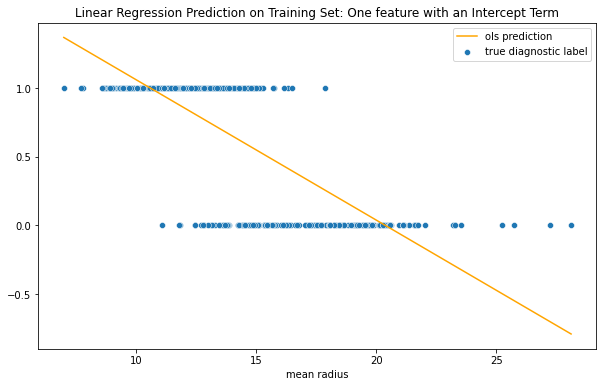

In [ ]:
# visualize predictions of linear regression model on training set 
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by linear regression model
# Solution:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train, label='true diagnostic label')
sns.lineplot(x = X_simple_train['mean radius'], y = X_simple_train["ols_pred"], color='orange', label='ols prediction').set(ylabel=None)
plt.title('Linear Regression Prediction on Training Set: One feature with an Intercept Term');

Use the generic rule, classify the data point as label 1 if ordinary least square regression returns a predicted value greater than or equal to 1/2, and label value 0 otherwise.

**Question: Add ordinary least square predicted labels as a column to `X_simple_train` as `ols_pred_label`. Report training accuracy of linear regression.**

In [ ]:
# TODO: Compute label value predicted by ols and add the corresponding column
# Solution:
X_simple_train['ols_pred_label'] = pd.Series.astype(X_simple_train['ols_pred'] >= 0.5, dtype=int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Check your X_simple_train columns
X_simple_train

,mean radius,intercept,ols_pred,ols_pred_label
381,11.040,1.0,0.952802,1
63,9.173,1.0,1.143538,1
25,17.140,1.0,0.329613,0
369,22.010,1.0,-0.167917,0
564,21.560,1.0,-0.121944,0
...,...,...,...,...
438,13.850,1.0,0.665726,1
210,20.580,1.0,-0.021825,0
33,19.270,1.0,0.112007,0
194,14.860,1.0,0.562542,1


In [ ]:
# TODO: Compute training accuracy of ordinary least square model
# Solution:
print('Training accuracy of ordinary least square regression with one feature and an intercept term:', sum(X_simple_train['ols_pred_label'] == y_simple_train) / len(y_simple_train))

Training accuracy of ordinary least square regression with one feature and an intercept term: 0.8813186813186813


**Question: Perform the same procedure above on the test set. What similarity do you observe? What do you want to say about linear regression for classification? How well do you think it performs?**

In [ ]:
# TODO: predict label values on test set
# Solution:
y_pred_simple_test = ols_predict(X_simple_test, vec_ols)

# TODO: append prediction column to X_simple_train
# Solution:
X_simple_test['ols_pred'] = y_pred_simple_test

# TODO: compute MSE of linear regression model on training set
# Solution:
ols_simple_test_mse = mse(y_simple_test, y_pred_simple_test)

print("MSE of linear regression model with one feature and intercept term on test set:", ols_simple_test_mse)

MSE of linear regression model with one feature and intercept term on test set: 0.138793785091535


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


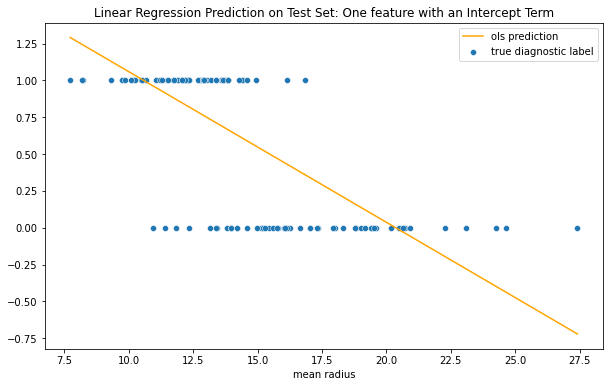

In [ ]:
# visualize predictions of linear regression model on test set 
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by linear regression model
# Solution:
sns.scatterplot(x = X_simple_test['mean radius'], y = y_simple_test, label='true diagnostic label')
sns.lineplot(x = X_simple_test['mean radius'], y = X_simple_test["ols_pred"], color='orange', label='ols prediction').set(ylabel=None)
plt.title('Linear Regression Prediction on Test Set: One feature with an Intercept Term');

In [ ]:
# TODO: Compute label value predicted by ols and add the corresponding column
# Solution:
X_simple_test['old_pred_label'] = pd.Series.astype(X_simple_test['ols_pred'] >= 0.5, dtype=int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Check your X_simple_test columns
X_simple_test

,mean radius,intercept,ols_pred,old_pred_label
205,15.12,1.0,0.535980,1
562,15.22,1.0,0.525764,1
41,10.95,1.0,0.961996,1
503,23.09,1.0,-0.278252,0
426,10.48,1.0,1.010013,1
...,...,...,...,...
12,19.17,1.0,0.122224,0
32,17.02,1.0,0.341872,0
373,20.64,1.0,-0.027955,0
255,13.96,1.0,0.654488,1


In [ ]:
# TODO: Compute test accuracy of ordinary least square model
# Solution:
print('Test accuracy of ordinary least square regression with one feature and an intercept term:', sum(X_simple_test['old_pred_label'] == y_simple_test) / len(y_simple_test))

Test accuracy of ordinary least square regression with one feature and an intercept term: 0.8245614035087719


*Solution:*

*You can see there are a couple problems in linear regression models for binary classification problems:*

*   *Linear regression predicts values that are continous, which is not restricted to the 0-1 binary label values. We need an extra procedure to turn predicted numerical values into 0-1 binary label, with some unknown decision rules.*
*   *Predicted values from linear regression models go beyond the range from 0 to 1. We can deal with predictions with values between 0 and 1, but it's difficult to treat predictions outside this range.*
*   *If you look at the prediction line given by ordinary least squares, there's no meaningful interpretation on what its prediction values mean (can't interpret it as a probability, for example). It has nothing to do with 0-1 labels given in our classification problem.*

*But if you look at predicted label value on both training and test set, using general rule with threshold 1/2, linear regression still does a decent job in classification, although we cannot interpret its predicted value.*




## Theories of Logistic Regression: Fundamental Concepts

You shold observe from the previous example, that linear regression for classification doesn't perform as well as expected. Linear regression predicts a continuous numerical value from given feature space, but it's difficult for us to transform that numerical value into an 0-1 binary label. These values are not strictly between 0 and 1, so we cannot make this transformation without adding other heuristics. As you should see from previous weeks, ordinary least square regression model can be sensitive to outliers, and is thus unreliable.

This is where logistic regression models play an important role in classification. You'll start to examine binary classification problem in this assignment, and we'll introduce its extension to multiclass classification problems in the course note.

### Definition

In a binary classification problem, the logistic regression model predicts the **probability** that the **binary** response variable $Y$ takes the value of 1 given the features $x \in R^d$:

$$ P(Y = 1|x) = f_\theta(x) = \frac {1} {1 + \exp(-\sum_{k=1} ^{d} {\theta_k x_k})}$$

Similar to linear regression model, the **parameters** we want to learn in logistic regression model is weight vector $\theta \in R^d$. You should observe that in prediction, we still have predicted probability as a **function** of $\theta^T x$. So logistic regression can usually be interpreted as an extension of linear models, called **generalized linear model**.

### Logistic Activation Function

Logistic regression model derives from the **logisitic function**, called **sigmoid**:
$$ s(t) = \frac {1} {1 + e^{-t}} $$

You should observe that sigmoid function takes in a feature vector in $R^d$ and outputs a probability between 0 and 1. This is how logistic regression always works in binary classification problems. The sigmoid function is so commonly used in the ML field, and you can see more of its applications in the following week when we talk about neural networks.

**Question: Let's look at the properties of the sigmoid function. Implement the sigmoid function in python.**

In [ ]:
# TODO: implement sigmoid function
# Solution:
def sigmoid(t):
  return 1 / (1 + np.exp(-t))



*   Domain of $s(t)$: $-\infty < t < \infty$
*   Range of $s(t)$: $0 < s(t) < 1$
*   Threshold Value: $s(0) = 0.5$
*   Reflection and Symmetry of $s(t)$: 
$$ 1 - s(t) = 1 - \frac {1} {1 + e^{-t}} = \frac {e^{-t}} {1 + e^{-t}} = s(-t) $$




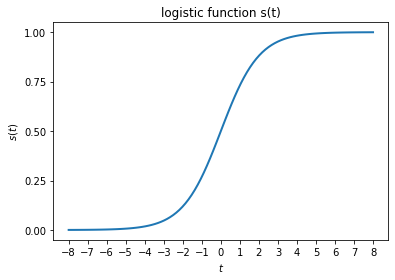

In [ ]:
# plot shape of logistic function
t = np.linspace(-8, 8, 100)
plt.plot(t, sigmoid(t), lw=2) 
plt.xticks(range(-8, 9))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.title('logistic function s(t)');

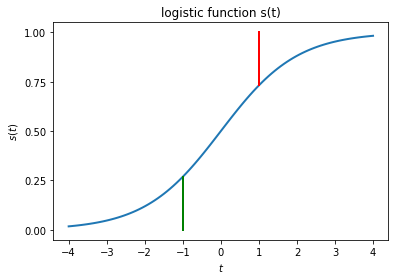

In [ ]:
# plot symmetry of logistic function
t = np.linspace(-4, 4, 100)
plt.plot(t, sigmoid(t), lw=2) 
plt.xticks(range(-4, 5))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.plot([1, 1], [sigmoid(1), 1], lw=2, color='red')
plt.plot([-1, -1], [0, sigmoid(-1)], lw=2, color='green')
plt.xlabel('$t$')
plt.ylabel('$s(t)$')
plt.title('logistic function s(t)');


*   Inverse of $s(t)$: 
$$ s(t) = z = \frac {1} {1 + e^{-t}}, 0 < z < 1 $$
$$ e^{-t} = \frac {1-z} {z}$$
$$ t = -\log(\frac {1-z} {z}) = \log(\frac {z} {1-z}), 0 < z < 1 $$
*   Derivative of $s(t)$ using chain rule:
$$ s'(t) = -\frac {-e^{t}} {(1 + e^{-t})^2} = s(t)(1 - s(t)) $$



### Decision Rule

Let's look at how the logistic activation function exactly solves binary classification problem. Recall from the course note that the output of sigmoid function is interpreted as probability the data point takes label 1. Given $s(0) = \frac {1}{2}$, intuitively we can use the sign of sigmoid function as a decision rule to classify 0 or 1. his is indeed how `sklearn` implements logistic regression model:
*   **If $s(\hat {\theta}^Tx) \ge \frac{1}{2}$, predict this data point as class 1.**
*   **If $s(\hat {\theta}^Tx) < \frac{1}{2}$, predict this data point as class 0.**

You can think of this decision rule as using a **"threshold"** value of $\frac {1}{2}$ based on the sigmoid function. Then this threshold value is a hyperparameter in logistic regression. As always, you can use cross validation to tune this hyperparameter with custom values. It's not always true that $\frac{1}{2}$ is the best threshold to implement the decision rule on unseen test data.

**Question: Now implement the decision function of our naive classifier. It takes input of a feature vector $x \in R^d$, a weight vector $\theta \in R^d$, and ouputs a prediction of binary label 0 or 1 for this data point.**

In [ ]:
# TODO: implement decision funcition of logistic regression model
# Solution:
def decision_rule(x, theta):
  pred_prob = sigmoid(x @ theta)
  if pred_prob >= 1/2:
    return 1
  else:
    return 0

### Loss Function

Recall in linear regression, we use the mean squared error (MSE) as our loss function. We find the optimal weight vector by minimizing the squared loss on a training set.

However, MSE doesn't work as intended in classification problems. In classification, each prediction happens in terms of the probability of a data point being label 1. For example, a test point has observed true label of 1, and our classifier predicts its probability of 1 as 0.6. Based on our decision rule of 0.5, the classifier will report a prediction of 1. The MSE of this data point will report 0. However, we know the actual predicted probability is 0.6, still far away from true probability 1. So we are still far from minimizing the loss, and we need to define a new loss function that can account for this 0.4 gap.

This is how **negative log-likelihood function** as loss in classification comes from. It is also called **cross entropy** loss.

Given training points $(x_i, y_i), i = 1...n$, cross entropy loss is defined as

$$ L(\theta) = - \sum_{i=1}^{n} {y_i\log(f_\theta(x_i)) + (1-y_i)\log(1 - f_\theta(x_i))} $$

Unlike squared loss, cross entropy loss is not a convex function, so there's no close form solution to it. Usually you need to use gradient descent to find a global optimum with respect to the data.

**Question: Implement the cross entropy loss function below as `cross_entropy_loss`. It should take in arguments `labels`, which are true labels, and `pred_probs`, which are predicted probabilities, and ouput the cross entropy loss of this classifier on this dataset.**

In [ ]:
# TODO: implement cross entropy loss function
def cross_entropy_loss(labels, pred_probs):
  return -sum(labels * np.log(pred_probs) + (1 - labels) * np.log(1 - pred_probs))

## A Closer Look into Logistic Regression: One Feature with an Intercept Term

Now you will redo what you did in first part, predicting binary class label of Wisconsin Breast Cancer Dataset with only one feature "mean radius" and an extra intercept term. But now you want to choose a logistic regression model.

Recall that logistic regression model can be interpreted as a generalized linear regression model. Feature space is first linearly parametrized by a weight vector $t = wx + b $, and then processed by sigmoid function $s(t)$ that turns a numerical value to a 0-1 probability. Since logistic weights cannot be minimized in close form formula, you want to spend some time to explore how to improve the prediction accuracy manually.

**Question: You can start with an arbitrary weight vector, corresponding to one feature "mean radius" and an extra intercept term. Assign this value you choose to `vec_lr`, it should be 2 dimensional.** 

A good hint to start is notice visualization of training and test points has reverse shape of signmoid function we plotted in previous part. What does this imply about sign of $w$ in our logistic regression model?

In [ ]:
# TODO: select weight vector parameter
# you may want to change parameter values in vec_lr
# Solution:
vec_lr = np.array([-1, 15]).reshape(2, 1)
vec_lr

array([[-1],
       [15]])

In [ ]:
# visualize structure of `X_simple_train`
X_simple_train

,mean radius,intercept,ols_pred,ols_pred_label
381,11.040,1.0,0.952802,1
63,9.173,1.0,1.143538,1
25,17.140,1.0,0.329613,0
369,22.010,1.0,-0.167917,0
564,21.560,1.0,-0.121944,0
...,...,...,...,...
438,13.850,1.0,0.665726,1
210,20.580,1.0,-0.021825,0
33,19.270,1.0,0.112007,0
194,14.860,1.0,0.562542,1


**Question: Use the weight vector `vec_lr` you chose, and feed it into your logistic regression model. Use the function you defined in the previous part, to compute the predicted probability of each training sample having label value 1.**

In [ ]:
# TODO: predicted probability of logistic regression model on training set
# HINT: `y_pred_probs_simple_train` should be a column vector in same length as number of training samples
# Solution:
y_pred_probs_simple_train = sigmoid(X_simple_train[['mean radius', 'intercept']] @ vec_lr)

# append logistic regression predicted probabilities to X_simple_train
X_simple_train['lr_pred_probs'] = y_pred_probs_simple_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X_simple_train.head()

,mean radius,intercept,ols_pred,ols_pred_label,lr_pred_probs
381,11.040,1.0,0.952802,1,0.981293
63,9.173,1.0,1.143538,1,0.997062
25,17.140,1.0,0.329613,0,0.105269
369,22.010,1.0,-0.167917,0,0.000902
564,21.560,1.0,-0.121944,0,0.001414


**Question: Compute MSE and cross entropy loss of logistic regression model on training set.**

In [ ]:
# TODO: compute mse
# Solution:
lr_simple_train_mse = mse(y_simple_train, y_pred_probs_simple_train[0])
print("MSE of linear regression model with one feature and intercept term on training set:", lr_simple_train_mse)

# TODO: compute cross entropy loss
# Solution
lr_simple_train_entropy = cross_entropy_loss(y_simple_train, y_pred_probs_simple_train[0])
print("Cross entropy loss of linear regression model with one feature and intercept term on training set:", lr_simple_train_entropy)

MSE of linear regression model with one feature and intercept term on training set: 0.08282656966978877
Cross entropy loss of linear regression model with one feature and intercept term on training set: 122.706508883344


**Question: Now we want to visualize decision boundary of logistic regression model. As before in linear regression model, use [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) for true label and feature values, and use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) for predicted probabilities given by logistic regression model.**

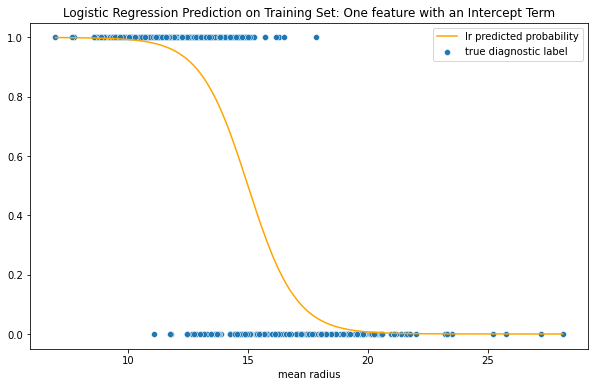

In [ ]:
# visualize logistic regression predictions
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by linear regression model
# Solution:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train, label='true diagnostic label')
sns.lineplot(x = X_simple_train['mean radius'], y = X_simple_train["lr_pred_probs"], color='orange', label='lr predicted probability').set(ylabel=None)
plt.title('Logistic Regression Prediction on Training Set: One feature with an Intercept Term');

We want to use general decision rule: predict label 1 if sigmoid function gives probability is greater than 1/2, and label 0 otherwise.

**Question: add predicted label value as a column `lr_pred_label` to `X_simple_train` and report training accuracy.**

In [ ]:
# TODO: Add predicted label value column of logistic regression model to X_simple_train
# Solution:
X_simple_train['lr_pred_label'] = pd.Series.astype(X_simple_train['lr_pred_probs'] >= 0.5, dtype=int)

# Check your training set columns
X_simple_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mean radius,intercept,ols_pred,ols_pred_label,lr_pred_probs,lr_pred_label
381,11.040,1.0,0.952802,1,0.981293,1
63,9.173,1.0,1.143538,1,0.997062,1
25,17.140,1.0,0.329613,0,0.105269,0
369,22.010,1.0,-0.167917,0,0.000902,0
564,21.560,1.0,-0.121944,0,0.001414,0


In [ ]:
# TODO: report training accuracy of logistic regression model using general threshold of 1/2
# Solution:
print('Training accuracy of logistic regression model with one feature and an intercept term:', sum(X_simple_train['lr_pred_label'] == y_simple_train) / len(y_simple_train))

Training accuracy of logistic regression model with one feature and an intercept term: 0.8967032967032967


Now from the visualization, you can think of logistic regression as approximating some sigmoid transformation as close to the distribution of true observed labels in the training set as possible. The way we use gradient descent to minimize the cross entropy loss is to consistently change the shape of the sigmoid function and find an optimal solution.

**Question: To complete fitting this simple logistic regression model, you want to evaluate its predicted probability on the test set. Complete the same process as the above on test set, and report your observations.**

In [ ]:
# TODO: predicted probability of logistic regression model on test set
# Solution:
y_pred_probs_simple_test = sigmoid(X_simple_test[['mean radius', 'intercept']] @ vec_lr)

# append logistic regression predicted probabilities to X_simple_test
X_simple_test['lr_pred_probs'] = y_pred_probs_simple_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_simple_test.head()

,mean radius,intercept,ols_pred,old_pred_label,lr_pred_probs
205,15.12,1.0,0.535980,1,0.470036
562,15.22,1.0,0.525764,1,0.445221
41,10.95,1.0,0.961996,1,0.982876
503,23.09,1.0,-0.278252,0,0.000306
426,10.48,1.0,1.010013,1,0.989228


In [ ]:
# TODO: compute mse
# Solution:
lr_simple_test_mse = mse(y_simple_test, y_pred_probs_simple_test[0])
print("MSE of linear regression model with one feature and intercept term on test set:", lr_simple_test_mse)

# TODO: compute cross entropy loss
# Solution
lr_simple_test_entropy = cross_entropy_loss(y_simple_test, y_pred_probs_simple_test[0])
print("Cross entropy loss of linear regression model with one feature and intercept term on test set:", lr_simple_test_entropy)

MSE of linear regression model with one feature and intercept term on test set: 0.11678699981601422
Cross entropy loss of linear regression model with one feature and intercept term on test set: 43.71796483909631


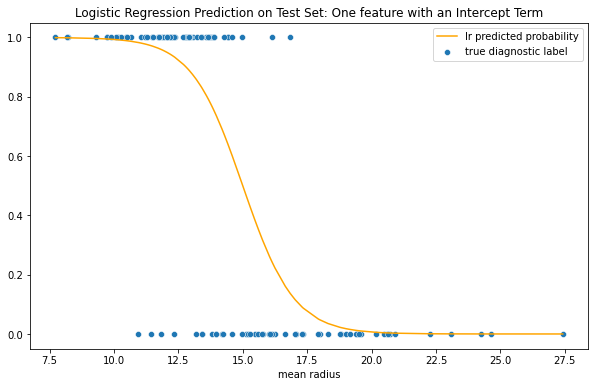

In [ ]:
# visualize logistic regression predictions
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by linear regression model
# Solution:
sns.scatterplot(x = X_simple_test['mean radius'], y = y_simple_test, label='true diagnostic label')
sns.lineplot(x = X_simple_test['mean radius'], y = X_simple_test["lr_pred_probs"], color='orange', label='lr predicted probability').set(ylabel=None)
plt.title('Logistic Regression Prediction on Test Set: One feature with an Intercept Term');

In [ ]:
# TODO: Add predicted label value column of logistic regression model to X_simple_test
# Solution:
X_simple_test['lr_pred_label'] = pd.Series.astype(X_simple_test['lr_pred_probs'] >= 0.5, dtype=int)

# Check your training set columns
X_simple_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mean radius,intercept,ols_pred,old_pred_label,lr_pred_probs,lr_pred_label
205,15.12,1.0,0.535980,1,0.470036,0
562,15.22,1.0,0.525764,1,0.445221,0
41,10.95,1.0,0.961996,1,0.982876,1
503,23.09,1.0,-0.278252,0,0.000306,0
426,10.48,1.0,1.010013,1,0.989228,1


In [ ]:
# TODO: report test accuracy of logistic regression model using general threshold of 1/2
# Solution:
print('Test accuracy of logistic regression model with one feature and an intercept term:', sum(X_simple_test['lr_pred_label'] == y_simple_test) / len(y_simple_test))

Test accuracy of logistic regression model with one feature and an intercept term: 0.8596491228070176


**Question: Compare your logistic regression model with one feature and an intercept term with linear regression model with same features. In what sense they are similar? In what sense they are different? What are your takeaways from current training and test accuracy? How do you want to further improve your logistic regression model on classification without adding more features?**

*Solution:*

*We use same decision rule for both linear regression and logistic regression, with threshold value of 1/2. The shape of predicted values, which is linear function that might bo beyond value between 0 and 1, and sigmoid function given by logistic regression, is similar. They are both monotone and decreasing with respect to feature values `mean_radiance`.*

*But you should notice that the shape of their predicted probability, if we interpret that for linear regression predictions within 0 and 1, are different. Linear regression is completely linear in features, but sigmoid function turns a linear transformation to nonlinear predicted values.*

*In previous weeks, you learn about cross validation and hyperparameter tuning. In lecture and course notes, you should realize that threshold value of decision boundary can be viewed as a hyperparameter in logistic regression. So we can use cross validaton to tune threshold value to see whether we can improve training and test accuracy.*

*Also, we talked about how to solve for optimal model parameter in logistic regression. It doesn't have a closed form, so we'll need to use gradient descent as a more general optimization technique to iteratively optimize model parameters.*

## Optimize your Simple Logistic Regression Model: One Feature with an Intercept Term

In this section, we'll perform two ways to find optimal parameter of logistic regression model: gradient descent and hyperparameter tuning with cross validation.

### Gradient Descent in Logistic Regression Model

Last week, you are introduced to gradient descent algorithm, and implement stochastic gradient descent on some dataset. Now you will apply the same thought process on logistic regression. The model parameter we want to optimize is `vec_lr` in $R^2$. The loss function we want to minimize is cross entropy loss as defined in the previous part. Here we will walk through and apply gradient descent algorithm on logistic regression model, and find the minimized loss.


These are common variations of gradient descent algorithms that we mentioned in the course note. $\alpha$ is step size. $s_i$ is predicted probability of data point $i$.

*   Batch gradient descent:
$$ \theta^{(t+1)} = \theta^{(t)} + \alpha \cdot \frac{1}{n} \sum_{i=1}^{n} { (y_i - s_i) X_i } $$
*   Stochastic gradient descent:
$$ \theta^{(t+1)} = \theta^{(t)} + \alpha \cdot (y_i - s_i)X_i $$
*   Mini-batch gradient descent:
$$ \theta^{(t+1)} = \theta^{(t)} + \alpha \cdot \frac{1}{|B|} \sum_{i \in B} {(y_i - s_i)X_i} $$





#### Batch Gradient Descent

**Question: Implement batch gradient descent on training set, with respect to cross entropy loss function. For simplicity, you will perform in total 1000 iterations, with step size 0.001 defined for you. You may want to first change pandas dataframe of `X_simple_train` to a numpy array to better work with matrix vector multiplication.**

In [ ]:
# due to time constraint, we will only implement 10000 iterations
num_iter = 10000

# set step size to be as small as 0.001
alpha = 0.1

# for simplicity, first transofmr training set features to numpy array
X_simple_train_grad = X_simple_train[['mean radius', 'intercept']].to_numpy()

In [ ]:
# TODO: Implement batch gradient descent on logistic regression model
# Solution:

# initialize with random value [0, 0]
vec_lr_batch = np.array([0.0, 0.0], dtype='float').reshape(2, 1)

# array to save cross entropy loss throughout process
loss_batch = []

# implement batch gradient descent
for i in range(num_iter):

  # compute loss at current iteration
  curr_loss = 0
  for j in range(X_simple_train_grad.shape[0]):
    curr_raw_score = (X_simple_train_grad[j] @ vec_lr_batch)[0]
    curr_loss += - y_simple_train[j] * np.log(sigmoid(curr_raw_score)) - (1 - y_simple_train[j]) * np.log(1 - sigmoid(curr_raw_score))
  loss_batch.append(curr_loss)

  # initiate gradient update vector
  sum_grad = np.array([0.0, 0.0]).reshape(2, 1)
  for j in range(X_simple_train_grad.shape[0]):
    s_j = sigmoid((X_simple_train_grad[j] @ vec_lr_batch)[0])
    curr_grad = (y_simple_train[j] - s_j) * X_simple_train_grad[j].reshape(2, 1)
    sum_grad += curr_grad
  sum_grad = sum_grad / X_simple_train_grad.shape[0]
  
  # perform gradient update
  vec_lr_batch = vec_lr_batch + alpha * sum_grad

**Question: Plot your cross entropy loss on training set with respect to number of iterations using batch gradient descent. You should see that the loss is consistently decreasing monotonely. Then report the final cross entropy loss value that batch gradient descent converges to.**

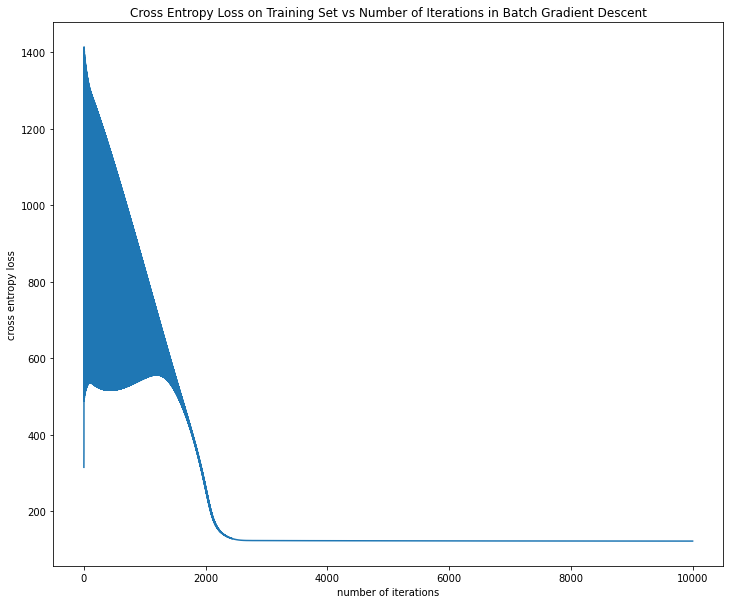

In [ ]:
# TODO: visulize change in cross entropy loss with respect to number of iterations
# Solution:

plt.figure(figsize=(12, 10))
x_axis = np.arange(0, num_iter, 1)
sns.lineplot(x = x_axis, y = loss_batch)
plt.xlabel('number of iterations')
plt.ylabel('cross entropy loss')
plt.title('Cross Entropy Loss on Training Set vs Number of Iterations in Batch Gradient Descent');

In [ ]:
# TODO: Report final cross entropy loss on training set that batch gradient descent converges to
# Solution:

print('Final cross entropy loss on training set with batch gradient descent:', loss_batch[-1])

Final cross entropy loss on training set with batch gradient descent: 122.51568549479033


**Question: Use the optimal model parameter found by batch gradient descent to compute predicted probability given by logistic regression model. Visualize the decision boundary, i.e. shape of sigmoid function, compared to true label value.**

In [ ]:
# final logistic regression model parameter by batch gradient descent
vec_lr_batch

array([[-0.99504805],
       [14.80645082]])

In [ ]:
# TODO: predicted probability of logistic regression model on training set
# HINT: `y_pred_probs_simple_train` should be a column vector in same length as number of training samples
# Solution:
batch_scores = (X_simple_train_grad @ vec_lr_batch).reshape(X_simple_train_grad.shape[0])
batch_probs = sigmoid(batch_scores)

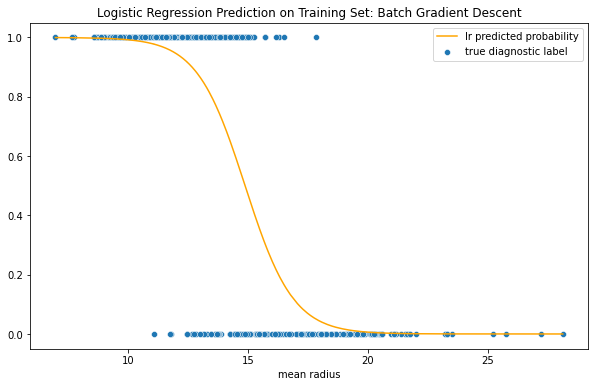

In [ ]:
# visualize logistic regression predictions
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by batch logistic regression model
# Solution:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train, label='true diagnostic label')
sns.lineplot(x = X_simple_train['mean radius'], y = batch_probs, color='orange', label='lr predicted probability').set(ylabel=None)
plt.title('Logistic Regression Prediction on Training Set: Batch Gradient Descent');

**Question: Now compute training and test accuracy of batch gradient descent solution to logistic regression model.**

In [ ]:
# TODO: compute predicted labels of batch logisitc regression model
# Solution:
y_pred_label_batch = (batch_probs >= 0.5).astype(int)

# TODO: Compute training accuracy:
# Solution:
print('Training accuracy of Batch Logistic Regression model:', 
      sum(y_pred_label_batch == y_simple_train) / len(y_simple_train))

Training accuracy of Batch Logistic Regression model: 0.8879120879120879


In [ ]:
# TODO: compute predicted labels of batch logisitc regression model
# Solution:
batch_test_scores = (X_simple_test[['mean radius', 'intercept']] @ vec_lr_batch)
batch_test_probs = sigmoid(batch_test_scores)

y_pred_test_label_batch = (batch_test_probs >= 0.5).astype(int).to_numpy().reshape(len(y_simple_test))

# TODO: Compute test accuracy:
# Solution:
print('Test accuracy of Batch Logistic Regression model:', 
      sum(y_pred_test_label_batch == y_simple_test) / len(y_simple_test))

Test accuracy of Batch Logistic Regression model: 0.8596491228070176


#### Stochastic Gradient Descent

**Question: Implement stochastic gradient descent on training set, with respect to cross entropy loss function. Use same set of parameters as in the previous part.**

In [ ]:
# TODO: Implement batch gradient descent on logistic regression model
# Solution:

# initialize with random value [0, 0]
vec_lr_stochastic = np.array([0.0, 0.0], dtype='float').reshape(2, 1)

# array to save cross entropy loss throughout process
loss_stochastic = []

# implement batch gradient descent
for i in range(num_iter):

  # compute loss at current iteration
  curr_loss = 0
  for j in range(X_simple_train_grad.shape[0]):
    curr_raw_score = (X_simple_train_grad[j] @ vec_lr_stochastic)[0]
    curr_loss += - y_simple_train[j] * np.log(sigmoid(curr_raw_score)) - (1 - y_simple_train[j]) * np.log(1 - sigmoid(curr_raw_score))
  loss_stochastic.append(curr_loss)

  # initiate gradient update vector
  j = np.random.randint(0, X_simple_train_grad.shape[0])
  s_j = sigmoid((X_simple_train_grad[j] @ vec_lr_stochastic)[0])
  sum_grad = (y_simple_train[j] - s_j) * X_simple_train_grad[j].reshape(2, 1)
  
  # perform gradient update
  vec_lr_stochastic = vec_lr_stochastic + alpha * sum_grad

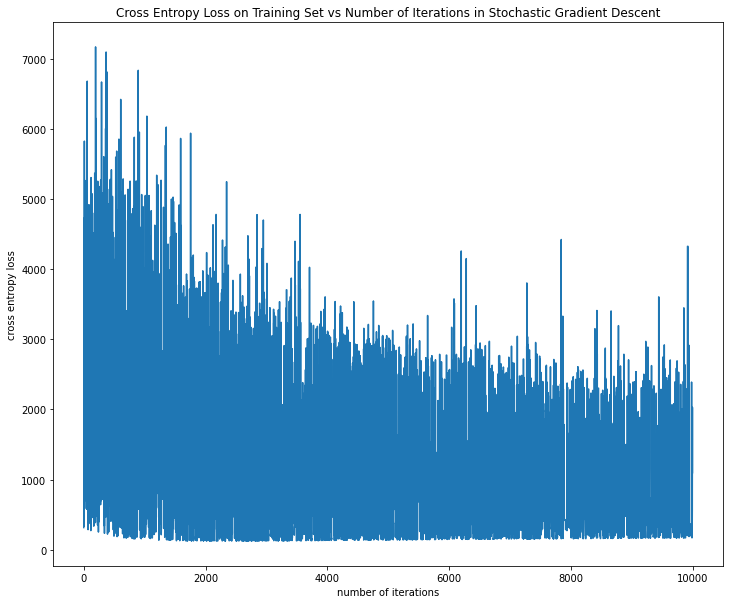

In [ ]:
# TODO: visulize change in cross entropy loss with respect to number of iterations
# Solution:

plt.figure(figsize=(12, 10))
x_axis = np.arange(0, num_iter, 1)
sns.lineplot(x = x_axis, y = loss_stochastic)
plt.xlabel('number of iterations')
plt.ylabel('cross entropy loss')
plt.title('Cross Entropy Loss on Training Set vs Number of Iterations in Stochastic Gradient Descent');

In [ ]:
# TODO: Report final cross entropy loss on training set that stochastic gradient descent converges to
# Solution:

print('Final cross entropy loss on training set with stochastic gradient descent:', loss_stochastic[-1])

Final cross entropy loss on training set with stochastic gradient descent: 1097.892148904974


In [ ]:
# final logistic regression model parameter by stochastic gradient descent
vec_lr_stochastic

array([[-3.38551744],
       [38.89963455]])

In [ ]:
# TODO: predicted probability of logistic regression model on training set
# HINT: `y_pred_probs_simple_train` should be a column vector in same length as number of training samples
# Solution:
stochastic_scores = (X_simple_train_grad @ vec_lr_stochastic).reshape(X_simple_train_grad.shape[0])
stochastic_probs = sigmoid(stochastic_scores)

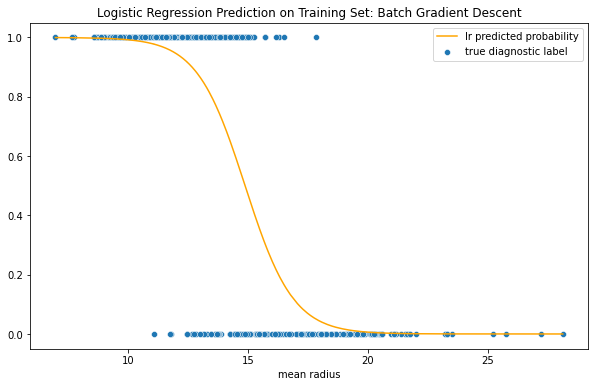

In [ ]:
# visualize logistic regression predictions
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by batch logistic regression model
# Solution:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train, label='true diagnostic label')
sns.lineplot(x = X_simple_train['mean radius'], y = batch_probs, color='orange', label='lr predicted probability').set(ylabel=None)
plt.title('Logistic Regression Prediction on Training Set: Batch Gradient Descent');

**Question: Now compute training and test accuracy of stochastic gradient descent solution to logistic regression model.**

In [ ]:
# TODO: compute predicted labels of stochastic logisitc regression model
# Solution:
y_pred_label_stochastic = (stochastic_probs >= 0.5).astype(int)

# TODO: Compute training accuracy:
# Solution:
print('Training accuracy of Stochastic Logistic Regression model:', 
      sum(y_pred_label_stochastic == y_simple_train) / len(y_simple_train))

Training accuracy of Stochastic Logistic Regression model: 0.578021978021978


In [ ]:
# TODO: compute predicted labels of stochastic logisitc regression model
# Solution:
stochastic_test_scores = (X_simple_test[['mean radius', 'intercept']] @ vec_lr_stochastic)
stochastic_test_probs = sigmoid(stochastic_test_scores)

y_pred_test_label_stochastic = (stochastic_test_probs >= 0.5).astype(int).to_numpy().reshape(len(y_simple_test))

# TODO: Compute test accuracy:
# Solution:
print('Test accuracy of Stochastic Logistic Regression model:', 
      sum(y_pred_test_label_stochastic == y_simple_test) / len(y_simple_test))

Test accuracy of Stochastic Logistic Regression model: 0.5877192982456141


#### Mini-Batch Gradient Descent

**Question: Implement mini-batch gradient descent on training set, with respect to cross entropy loss function. Use same set of parameters as in the previous part. Use same set of parameter as train test split, we will sample 20% of training points as batch size to compute gradient update.**

In [ ]:
# hyperparameter batch size
B = int(0.2 * X_simple_train_grad.shape[0])
B

91

In [ ]:
# TODO: Implement batch gradient descent on logistic regression model
# Solution:

# initialize with random value [0, 0]
vec_lr_mini_batch = np.array([0.0, 0.0], dtype='float').reshape(2, 1)

# array to save cross entropy loss throughout process
loss_mini_batch = []

# implement batch gradient descent
for i in range(num_iter):

  # compute loss at current iteration
  curr_loss = 0
  for j in range(X_simple_train_grad.shape[0]):
    curr_raw_score = (X_simple_train_grad[j] @ vec_lr_mini_batch)[0]
    curr_loss += - y_simple_train[j] * np.log(sigmoid(curr_raw_score)) - (1 - y_simple_train[j]) * np.log(1 - sigmoid(curr_raw_score))
  loss_mini_batch.append(curr_loss)

  # initiate gradient update vector
  j = np.random.randint(0, X_simple_train_grad.shape[0])
  s_j = sigmoid((X_simple_train_grad[j] @ vec_lr_stochastic)[0])
  sum_grad = (y_simple_train[j] - s_j) * X_simple_train_grad[j].reshape(2, 1)

  # initiate gradient update vector
  sum_grad = np.array([0.0, 0.0]).reshape(2, 1)

  # sample a random subset of training points with batch size B
  batch_index = np.random.randint(0, X_simple_train_grad.shape[0], size=B)
  for j in batch_index:
    s_j = sigmoid((X_simple_train_grad[j] @ vec_lr_mini_batch)[0])
    curr_grad = (y_simple_train[j] - s_j) * X_simple_train_grad[j].reshape(2, 1)
    sum_grad += curr_grad
  sum_grad = sum_grad / B
  
  # perform gradient update
  vec_lr_mini_batch = vec_lr_mini_batch + alpha * sum_grad

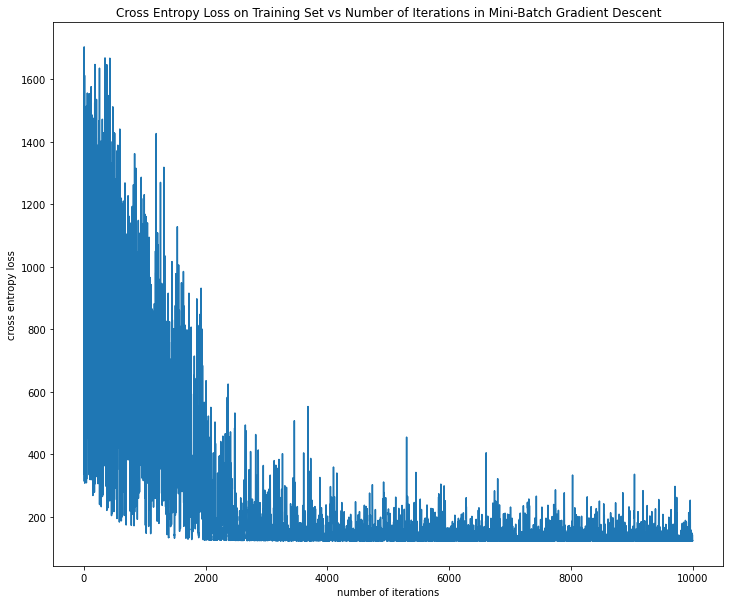

In [ ]:
# TODO: visulize change in cross entropy loss with respect to number of iterations
# Solution:

plt.figure(figsize=(12, 10))
x_axis = np.arange(0, num_iter, 1)
sns.lineplot(x = x_axis, y = loss_mini_batch)
plt.xlabel('number of iterations')
plt.ylabel('cross entropy loss')
plt.title('Cross Entropy Loss on Training Set vs Number of Iterations in Mini-Batch Gradient Descent');

In [ ]:
# TODO: Report final cross entropy loss on training set that mini-batch gradient descent converges to
# Solution:

print('Final cross entropy loss on training set with mini-batch gradient descent:', loss_mini_batch[-1])

Final cross entropy loss on training set with mini-batch gradient descent: 122.90492152494551


**Question: Use the optimal model parameter found by mini batch gradient descent to compute predicted probability given by logistic regression model. Visualize the decision boundary, i.e. shape of sigmoid function, compared to true label value.**

In [ ]:
# final logistic regression model parameter by batch gradient descent
vec_lr_mini_batch

array([[-1.14541049],
       [16.09682751]])

In [ ]:
# TODO: predicted probability of logistic regression model on training set
# HINT: `y_pred_probs_simple_train` should be a column vector in same length as number of training samples
# Solution:
mini_batch_scores = (X_simple_train_grad @ vec_lr_mini_batch).reshape(X_simple_train_grad.shape[0])
mini_batch_probs = sigmoid(mini_batch_scores)

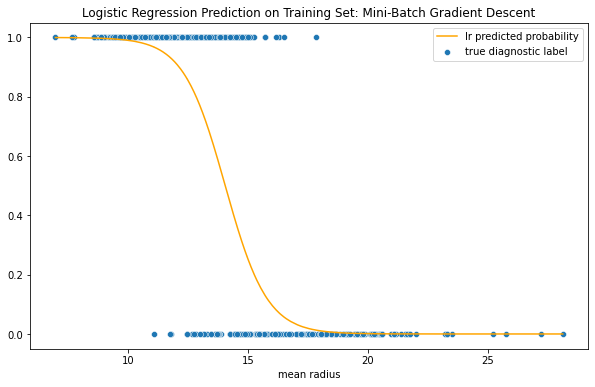

In [ ]:
# visualize logistic regression predictions
plt.figure(figsize=(10, 6))

# TODO: use scatterplot to visualize true label value of diagnosis, same as what you did in the previous part
#       use lineplot to visulize predicted value given by batch logistic regression model
# Solution:
sns.scatterplot(x = X_simple_train['mean radius'], y = y_simple_train, label='true diagnostic label')
sns.lineplot(x = X_simple_train['mean radius'], y = mini_batch_probs, color='orange', label='lr predicted probability').set(ylabel=None)
plt.title('Logistic Regression Prediction on Training Set: Mini-Batch Gradient Descent');

**Question: Use the optimal model parameter found by stochastic gradient descent to compute predicted probability given by logistic regression model. Visualize the decision boundary, i.e. shape of sigmoid function, compared to true label value.**

In [ ]:
# TODO: compute predicted labels of stochastic logisitc regression model
# Solution:
y_pred_label_mini_batch = (mini_batch_probs >= 0.5).astype(int)

# TODO: Compute training accuracy:
# Solution:
print('Training accuracy of Mini-Batch Logistic Regression model:', 
      sum(y_pred_label_mini_batch == y_simple_train) / len(y_simple_train))

Training accuracy of Mini-Batch Logistic Regression model: 0.8637362637362638


In [ ]:
# TODO: compute predicted labels of stochastic logisitc regression model
# Solution:
mini_batch_test_scores = (X_simple_test[['mean radius', 'intercept']] @ vec_lr_mini_batch)
mini_batch_test_probs = sigmoid(mini_batch_test_scores)

y_pred_test_label_mini_batch = (mini_batch_test_probs >= 0.5).astype(int).to_numpy().reshape(len(y_simple_test))

# TODO: Compute test accuracy:
# Solution:
print('Test accuracy of Mini-Batch Logistic Regression model:', 
      sum(y_pred_test_label_mini_batch == y_simple_test) / len(y_simple_test))

Test accuracy of Mini-Batch Logistic Regression model: 0.8421052631578947


**Question: Compare your optimal logistic greression model given by 3 types of gradient descent, with initial one you choose without optimize parameters. Comment on your observations.**

*Solution:*

*We need a huge amount of iterations to converge optimal logistic regression model parameter. We let you to perform 10000 iterations, this is a large number, and we are not using a lot amount of features. You should observe the speed of different gradient descent method. Honestly stochastic gradient descent still doesn't converge obviously at the end of the algorithm. But all of them give descent training and test accuracy which is great.*

### Hyperparameter Tuning: Threshold Value in Prediction

We are interested in whether changing threshold value in prediction rule will improve our logistic regression model performance. For simplicity, we will use model parameter approximnately same as the result given by gradient descent algorithm.

In [ ]:
# Define model parameter for hyperparameter tuning.
vec_lr_tune = np.array([-1, 15]).reshape(2, 1)

**Question: Compute training accuracy of logistic regression model, with different threshold value between 0 and 1. To help you get started, recall currently we use threshold value of 0.5. Find out the best hyperparameter threshold value, using cross validation.**

In [ ]:
# TODO: train validation set split
# Solution:
X_tune_train, X_tune_val, y_tune_train, y_tune_val = train_test_split(X_simple_train_grad, y_simple_train, test_size = 0.2)

In [ ]:
# TODO: set candidate values for threshold
# Solution:
thresholds = np.linspace(0, 1, 100)

# TODO: Compute tune predictions on training and validation set
# Solution:
tune_train_scores = X_tune_train @ vec_lr_tune
tune_train_pred = sigmoid(tune_train_scores).reshape(tune_train_scores.shape[0])
tune_val_scores = X_tune_val @ vec_lr_tune
tune_val_pred = sigmoid(tune_val_scores).reshape(tune_val_scores.shape[0])

In [ ]:
# TODO: Compute training and validation accuracy of differnet threshold value
# Solution:

tune_train_accuracy = []
tune_val_accuracy = []

for hyperparam in thresholds:
  tune_train_pred_label = (tune_train_pred >= hyperparam).astype(int)
  tune_val_pred_label = (tune_val_pred >= hyperparam).astype(int)

  tune_train_accuracy.append(sum(tune_train_pred_label == y_tune_train) / len(y_tune_train))
  tune_val_accuracy.append(sum(tune_val_pred_label == y_tune_val) / len(y_tune_val))

**Question: Plot training and validation accuracy with respect to different threshold values.**

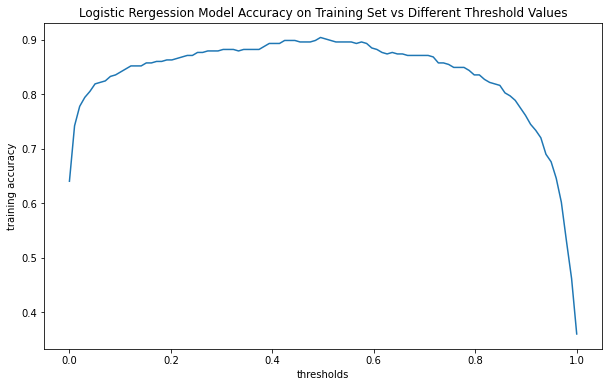

In [ ]:
# visualize hyperparameter tuning accuracy in training set
plt.figure(figsize=(10, 6))

# TODO: use lineplot to visualize training accuracy with respect to different threshold values
# Solution:
sns.lineplot(x = thresholds, y = tune_train_accuracy)
plt.xlabel('thresholds')
plt.ylabel('training accuracy')
plt.title('Logistic Rergession Model Accuracy on Training Set vs Different Threshold Values');

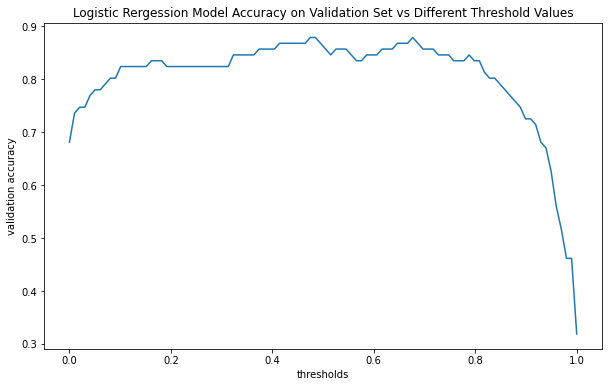

In [ ]:
# visualize hyperparameter tuning accuracy in training set
plt.figure(figsize=(10, 6))

# TODO: use lineplot to visualize validation accuracy with respect to different threshold values
# Solution:
sns.lineplot(x = thresholds, y = tune_val_accuracy)
plt.xlabel('thresholds')
plt.ylabel('validation accuracy')
plt.title('Logistic Rergession Model Accuracy on Validation Set vs Different Threshold Values');

**Question: Find best threshold value on training set and validation set. Are they the same? Which one you would choose to use in practice?**

In [ ]:
# TODO: Find best hyperparameter value that gives highest training accuracy
# Solution:
print('Best threshold value with highest training accuracy:', thresholds[np.argmax(tune_train_accuracy)])

Best threshold value with highest training accuracy: 0.494949494949495


In [ ]:
# TODO: Find best hyperparameter value that gives highest validation accuracy
# Solution:
print('Best threshold value with highest validation accuracy:', thresholds[np.argmax(tune_val_accuracy)])

Best threshold value with highest validation accuracy: 0.4747474747474748


*Solution: We can see that best threshold value on training and validation set is different by 15%. This is a large difference. Honestly we cannot use either of them as a single threshold to generalize logistic regression model, since both of them are subject to randomness in dataset. So we may look at the plot of accuracy with respect to different thresholds. We then conclude that 0.5, which is the value we initially use, is in range of the threshold values that give good prediction of labels. So any value within this range is reasonable.*

## Compare Logistic Regression to Nearst Neighbor Perspective

As you visualize decision boundary of logistic regression model on 1 dimensional inputs, you might find it similar to something we discussed earlier this week.

We talked about using kernels earlier this week. Kernel functions measure similarity between different data points in some way. In classification problems, we are interested in how features of data points are similar under the condition that they have the same label value.

From the kernel perspective, prediction on a new test point should be finding the closest data points in feature space, and taking certin weighted average of response values of these closest points. 

We now want to extend this idea to binary classification. Looking at the shape of the logistic regression decision boundary above, we propose another way to generate such a similar decision boundary.

Given a new test point $x$, suppose we focus on the $k$ closest points to $x$ in feature space. We predict the probability of $x$ has label $1$ in binary classification problem with the average of label values of all $k$ closest points. This is reasonable intuitively, since data points closer to each other in feature space should have the same label values. As you should have seen earlier this week, this is exactly how k-nearest neighbors works in regression and classification.

**Question: Now we want to implement the k-nearest neighbors algorithm in sklearn, visualize its decision boundary, and compare its similarity to logistic regression.**

In [ ]:
from sklearn.neighbors import NearestNeighbors

# TODO: change hyperparameter value k
# Solution:
k = 10
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X_simple_train[['mean radius', 'intercept']])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
# TODO: implement knn predicted probabilities
# HINT: first you want to find k closest point from test point in training set
#       second you want to compute average of label values of these closest points
#       third predictions is given by this mean
# Solution:
knn_pred_probs = []
for i in range(X_simple_test.shape[0]):
  test_point = np.array(X_simple_test[['mean radius', 'intercept']].iloc[i, :]).reshape(1, -1)
  neighbors = knn_model.kneighbors(test_point)[1]
  pred_prob = np.mean(y_simple_train[neighbors])
  knn_pred_probs.append(pred_prob)

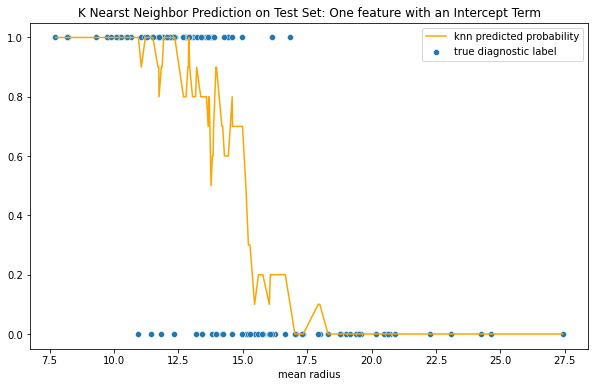

In [ ]:
# visualize knn predictions
plt.figure(figsize=(10, 6))

# TODO: plot true label values and predicted values given by k nearst neighbor
# Solution:
sns.scatterplot(x = X_simple_test['mean radius'], y = y_simple_test, label='true diagnostic label')
sns.lineplot(x = X_simple_test['mean radius'], y = knn_pred_probs, color='orange', label='knn predicted probability').set(ylabel=None)
plt.title('K Nearst Neighbor Prediction on Test Set: One feature with an Intercept Term');

**Question: Initialize with hyperparameter $k=5$. Plot the output of the knn model and report your observations. What does the model output look like? Do you feel it's a reasonable approach and can generate high test accuracy?**

*Solution: With $k=5$, the knn output is not smooth and there are many fluctuations. There are horizontal platforms where different feature values give same prediction. This will not have high test accuracy since we don't have much information from a small number of neighbors.*

**Question: Change the hyperparameter value $k$. What do you observe when you increase $k$? Compare the new output of k-nearst neighbor with large $k$ to logistic regression. In what sense are they similar and dissimilar?**

*Solution: As we increase $k$, the model output is smoother and has shape closer to the sigmoid function, especially for $k > 100$. They have similar trend and shape. But the exact curvature and derivative are different, since they are not the same function.*

**Question: After this trial, how do you want to interpret logistic regression  and the power of kernel functions? What would you comment on using kernel and k-nearst neighbor to approximate logistic regression?**

*Solution: With large enough $k$, k-nearst neighbor can generate a decision boundary close enough to logistic regression. This makes sense, since in k-nearst neighbors, predictions are completely determined by similar points in training set. In logistic regression model under parameter $\theta$, test points with similar feature values tend to have similar "score" values, and thus similar predictions.*

*In this simple example, it's resonable to use k-NN to approximate logistic regression as a classification model. K-NN has lower time complexity since it only needs to find the k closest points and compute the average of their labels. Logistic regression needs to compute linearly in $d$, the dimension of feature space. In general, we have $k < d$.*

## Application of Logistic Regression: Binary Classification in Breast Cancer Dataset

In the following part of this coding assignment, you will be looking at the breast cancer dataset from UCI machine learning library. This is a well-known dataset in the ML field. It includes several information of patients with or without cancer, and we'll use this information to build a binary logistic classifier to predict whether the patient has cancer or not. More details are at the UCI machine learning website. 

### Import packages

Before we get started, we'll need to import packages necessary to our assignment: 

*   [pandas](https://pandas.pydata.org/pandas-docs/stable/) - a package for performing data analysis and manipulation
*   [numpy](https://numpy.org/doc/stable/contents.html) - a package for scientific computing
*   [matplotlib](https://matplotlib.org/3.3.2/contents.html) - the standard Python plotting package
*   [seaborn](https://seaborn.pydata.org/) - a dataframe-centric visualization package that is built off of matplotlib

In [ ]:
# import necessary library and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset and Preliminary Understanding

The Wisconsin breast cancer dataset is fully understood and analyzed in the ML field. Scikit-learn library has a built-in [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function that imports this dataset. We no longer need to manually read csv files.

In [ ]:
# import breast cancer dataset from sklearn library
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# convert to pandas dataframe 
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
labels = dataset.target

In [ ]:
# number of features and data points
print(features.shape)
print(labels.shape)

(569, 30)
(569,)


In [ ]:
# binary labels
list(dataset.target_names)

['malignant', 'benign']

The entire dataset has 569 samples. There are in total 30 features for each patient sample. The diagnosis of each patient: M = malignant and B = benign corresponds to 0 and 1 values. Sklearn already partially preprocesses the dataset for us, patient ID column that is irrelevant to classfication has been removed.

Now let's look at what the feature columns are in our dataset.

In [ ]:
# peek into features
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# column names
print("Columns:", list(features.columns))

Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


You can observe that we will deal with different measurements of a single parameter. For example, you will consider "mean texture" and "worst texture" as two features. You might wonder whether this may lead to high correlation between features. Hopefully you can explore this when you evaluate your model.

For reference, the following is the complete attribute information of ten original real valued features from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)):

> Ten real-valued features are computed for each cell nucleus:

*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter^2 / area - 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension ("coastline approximation" - 1)











Let's look at whether there is a class imbalance in the dataset. You will examine the number of data points labelled 0 in the dataset versus the number of points labelled 1 in the dataset.

Number of non-cancer samples: 212 out of 569 samples in total.
Number of cancer samples: 357 out of 569 samples in total.


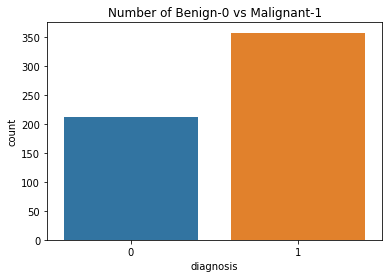

In [ ]:
print("Number of non-cancer samples:", sum(labels == 0), "out of", len(labels), "samples in total.")
print("Number of cancer samples:", sum(labels == 1), "out of", len(labels), "samples in total.")

sns.countplot(x = labels)
plt.xlabel('diagnosis')
plt.title('Number of Benign-0 vs Malignant-1');

Fortunately class imbalance is not a significant problem here, since each single class accounts for approximately one half of total number of samples.

### Data Cleaning

Given a dataset, you need to first deal with missing values in the dataset, if any. Remember there are different ways to approximate missing values: completely delete them, use low rank approximation, or use other statistics such as average over the same feature.

If you completely delete samples with missing values, this might lead to bias in your model and generalization issues as you might ignore a specific portion of the data. If you use other statistics to replace missing values, be careful with their properties: whether they are sensitive to outliers and what implications they bring etc.

You will look at whether we need to deal with missing values in our data set.

In [ ]:
for column in features.columns:
  print("Column", column, "has", sum(features[column].isnull()), "missing values.")

Column mean radius has 0 missing values.
Column mean texture has 0 missing values.
Column mean perimeter has 0 missing values.
Column mean area has 0 missing values.
Column mean smoothness has 0 missing values.
Column mean compactness has 0 missing values.
Column mean concavity has 0 missing values.
Column mean concave points has 0 missing values.
Column mean symmetry has 0 missing values.
Column mean fractal dimension has 0 missing values.
Column radius error has 0 missing values.
Column texture error has 0 missing values.
Column perimeter error has 0 missing values.
Column area error has 0 missing values.
Column smoothness error has 0 missing values.
Column compactness error has 0 missing values.
Column concavity error has 0 missing values.
Column concave points error has 0 missing values.
Column symmetry error has 0 missing values.
Column fractal dimension error has 0 missing values.
Column worst radius has 0 missing values.
Column worst texture has 0 missing values.
Column worst pe

There's no missing values you need to consider in this case. Fortunately, binary labels "M = malignment" and "B = belignment" have already been transformed as numerical labels 1 and 0 correspondingly. So this dataset can be directly used for classification.

**Question: Now, construct a pandas dataframe that contains the means and standard deviations of each column in `features` table. You want to explore whether values of features are in a similar range.**

In [ ]:
# TODO: assign mean and sd of each column and make a dataframe containing all values
# Solution:
feature_mean_sd = pd.DataFrame(np.mean(features, axis=0), columns = ['average'])
feature_mean_sd['standard deviation'] = np.std(features, axis=0)
feature_mean_sd = feature_mean_sd.reset_index().rename(columns = {'index': "feature"})
feature_mean_sd

,feature,average,standard deviation
0,mean radius,14.127292,3.520951
1,mean texture,19.289649,4.297255
2,mean perimeter,91.969033,24.277619
3,mean area,654.889104,351.604754
4,mean smoothness,0.096360,0.014052
5,mean compactness,0.104341,0.052766
6,mean concavity,0.088799,0.079650
7,mean concave points,0.048919,0.038769
8,mean symmetry,0.181162,0.027390
9,mean fractal dimension,0.062798,0.007054


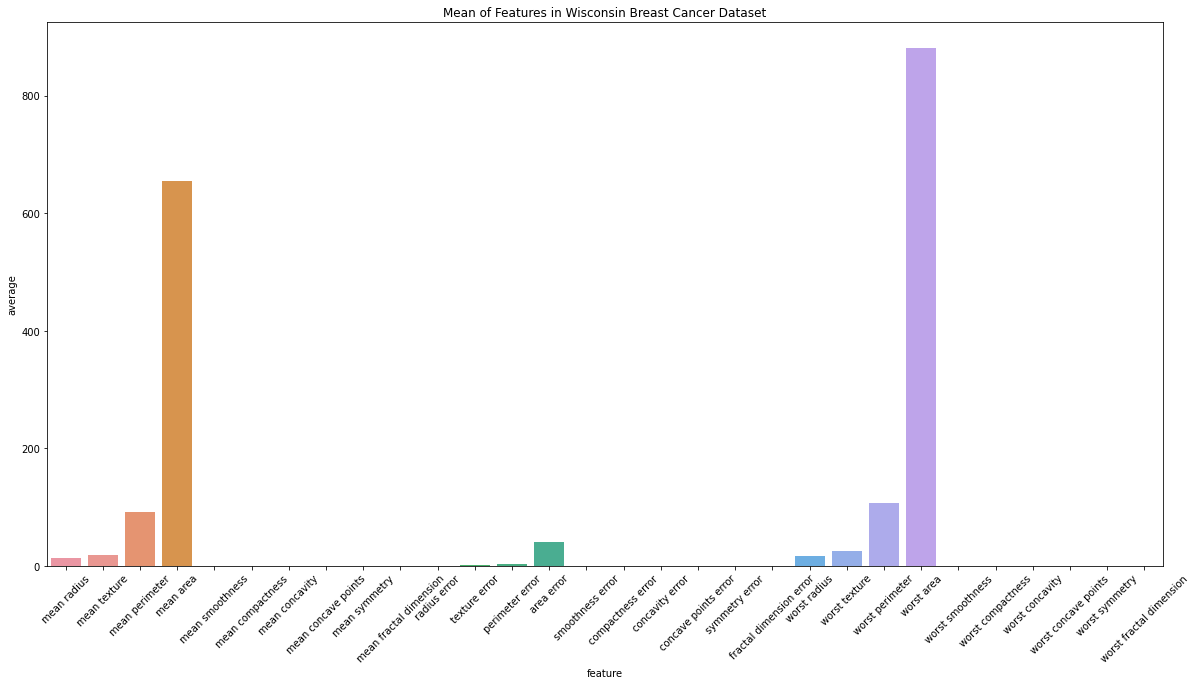

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='feature', y='average', data=feature_mean_sd)
plt.xticks(rotation=45)
plt.title('Mean of Features in Wisconsin Breast Cancer Dataset');

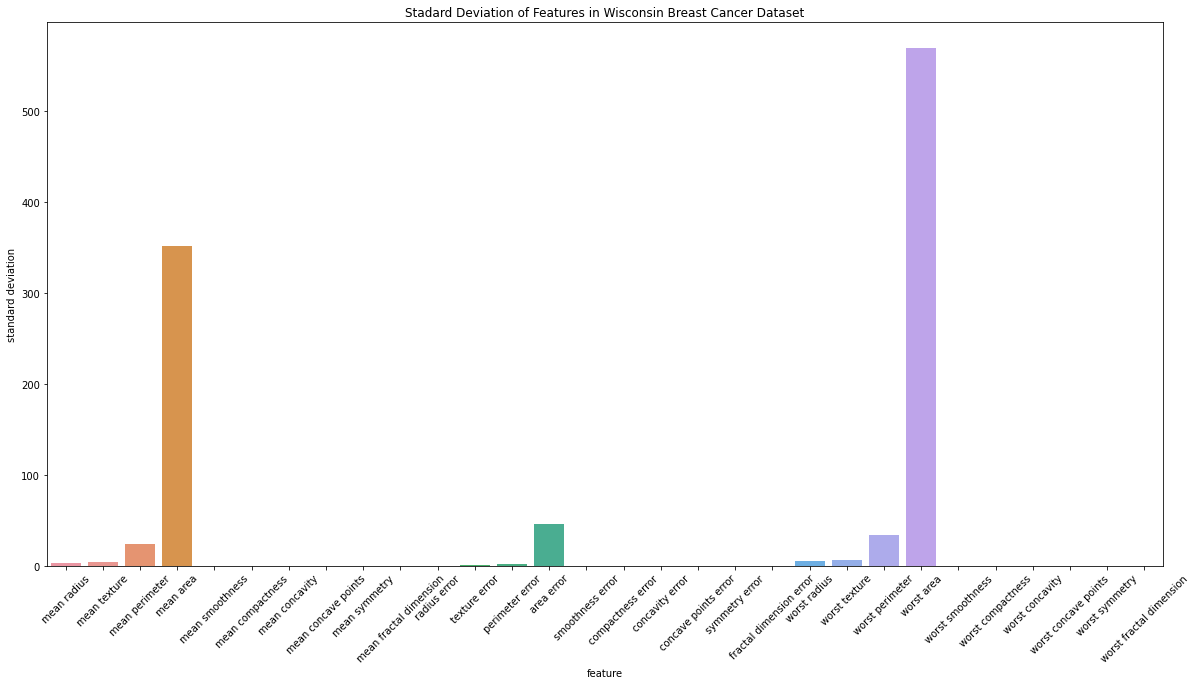

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='feature', y='standard deviation', data=feature_mean_sd)
plt.xticks(rotation=45)
plt.title('Stadard Deviation of Features in Wisconsin Breast Cancer Dataset');

**Question: Report your observations on the training set. What is the range of different features in the training set? What data cleaning techniques might you want to use right now?**

*Solution:*

*From the table and barplot with mean and standard deviation of features, we observe that *mean area* and *worst area* has significantly larger values than other features. This reminds you of an important step in feature engineering that you learned from previous weeks: normalize or standardize features.* 

*Normalization is really important, especially if you want to train a neural network classifier. Significant differences in range of feature values will lead to huge discrepancies in learned weights from machine learning algorithms. So normalize your data first.*

**Question: Noramlize dataset `features` loaded from `sklearn` library directly. You can reassign new dataframe to the same variable name without creating a new one.**

In [ ]:
# TODO: normalize dataset `features`
# HINT: find mean, std of each column in dataset
#       compute standard unit
# Solution:    
means = np.mean(features, axis=0)
sds = np.std(features, axis=0)
features = (features - means) / sds
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Exploratory Data Analysis

You should observe that the original dataset has 10 types of features. We are given the mean, standard deviation, and extreme value of each feature, so we will use 30 features in total to make predictions. You will visualize features from these three perspectives respectively.

In [ ]:
# split features to groups
features_mean = np.array(features.columns[:10])
features_error = np.array(features.columns[10:20])
features_worst = np.array(features.columns[20:31])

# add label column to features
features['diagnosis'] = labels

#### Data Visualization of Mean Features

We want to observe the distribution of all mean feature values, seperated by breast cancer diagnosis labels. We want to learn whether certain feature values are correlated to the diagnosis of breast cancer.

**Question: Visualize 3 set of features respectively. Specifically, for each set of features, draw a [boxplot](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.boxplot.html) revealing distribution of feature values, separated by diagnosis label values $\{0, 1\}$. Then draw a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) revealing correlation between different features. You should remember that highly correlated features doesn't help improve performance of model.**

**Then based on the boxplot, briefly describe the distribution of values of features in different groups in terms of different label values.**

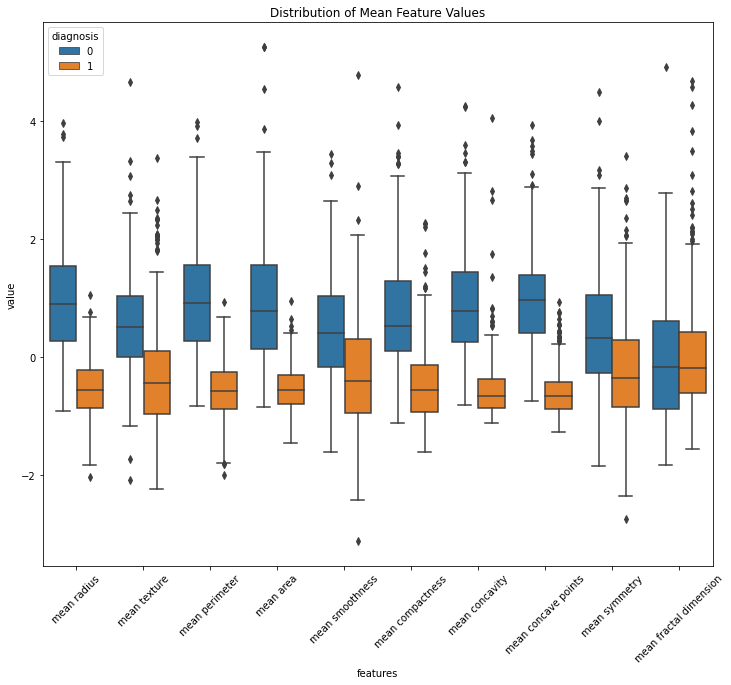

In [ ]:
# boxplot of distribution of mean festures, separated by breast cancer binary labels
temp = pd.concat([features['diagnosis'], features[features_mean]], axis=1)
temp = pd.melt(temp, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(12,10))

# TODO: boxplot
# Solution:
sns.boxplot(x="features", y="value", hue="diagnosis", data=temp)

plt.xticks(rotation=45)
plt.title("Distribution of Mean Feature Values");

*Solution: You shold observe that "mean fractal dimension" has similar distribution between "M" and "B" labels. All other mean feature distributions have visible differences.*

Then you want to look at whether there is high correlation between different features in the same group.

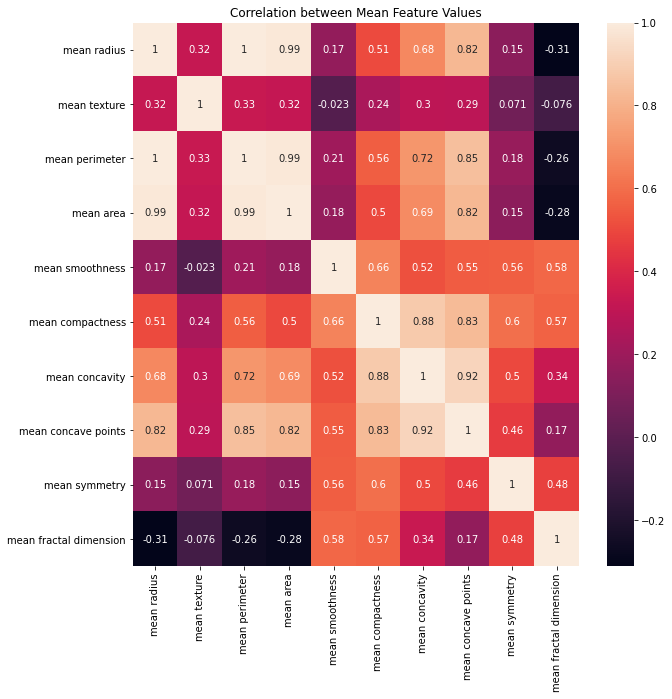

In [ ]:
# heatmap of correlation between mean features
plt.figure(figsize=(10,10))

# TODO: heatmap
# Solution:
sns.heatmap(data=features[features_mean].corr(), annot=True)

plt.title('Correlation between Mean Feature Values');

#### Data Visualization of Error Features

We want to observe distribution of all error feature values, seperated by breast cancer diagnosis labels. We want to learn whether certain feature values are correlated to diagnosis of breast cancer.

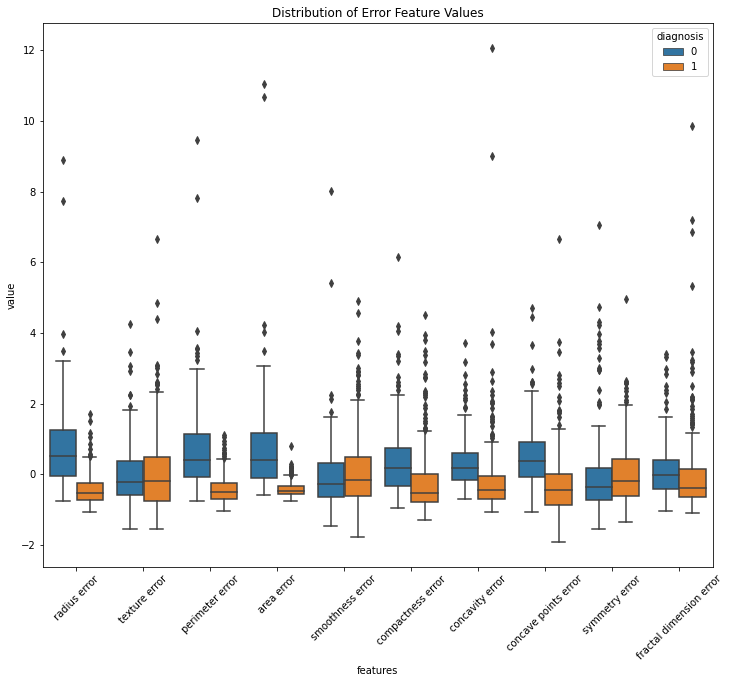

In [ ]:
# boxplot of distribution of error festures, separated by breast cancer binary labels
temp = pd.concat([features['diagnosis'], features[features_error]], axis=1)
temp = pd.melt(temp, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(12,10))

# TODO: boxplot
# Solution:
sns.boxplot(x="features", y="value", hue="diagnosis", data=temp)

plt.xticks(rotation=45)
plt.title("Distribution of Error Feature Values");

*Obviously, distribution of error features has higher variance. There are more outliers in values of variance than means. Except for "texture error", all other error features have visible difference in distribution relative to "M" and "B" labels.*

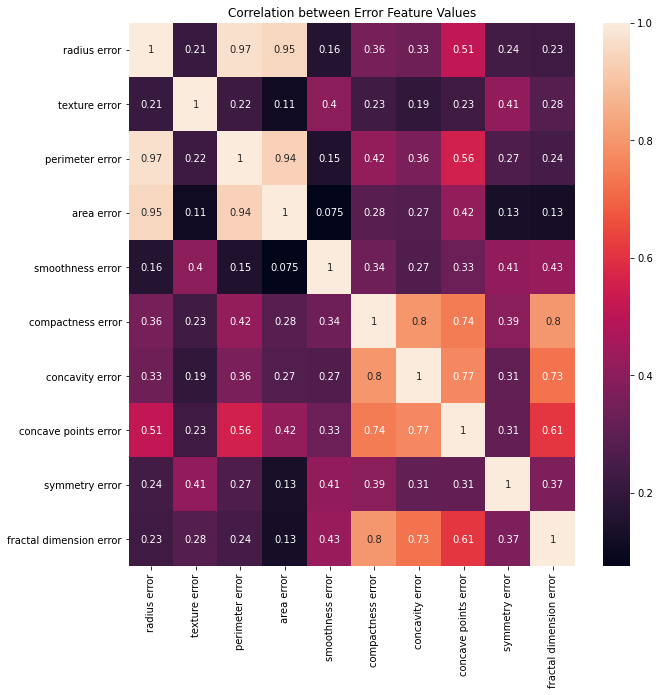

In [ ]:
# heatmap of correlation between error features
plt.figure(figsize=(10,10))

# TODO: heatmap
# Solution:
sns.heatmap(data=features[features_error].corr(), annot=True)

plt.title('Correlation between Error Feature Values');

#### Data Visualization of Worst Features

We want to observe distribution of all error feature values, seperated by breast cancer diagnosis labels. We want to learn whether certain feature values are correlated to diagnosis of breast cancer.

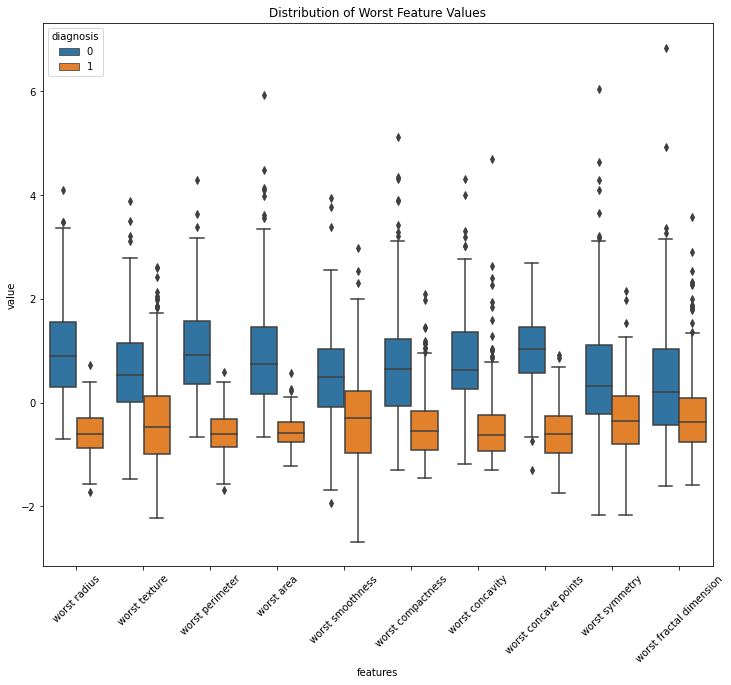

In [ ]:
# boxplot of distribution of worst festures, separated by breast cancer binary labels
temp = pd.concat([features['diagnosis'], features[features_worst]], axis=1)
temp = pd.melt(temp, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(12,10))

# TODO: boxplot
# Solution:
sns.boxplot(x="features", y="value", hue="diagnosis", data=temp)

plt.xticks(rotation=45)
plt.title("Distribution of Worst Feature Values");

*Solution: Fortunately, all worst features have distinct distribution for samples in "M" and "B" labels. This concludes that they are all valid features to be used in prediction.*

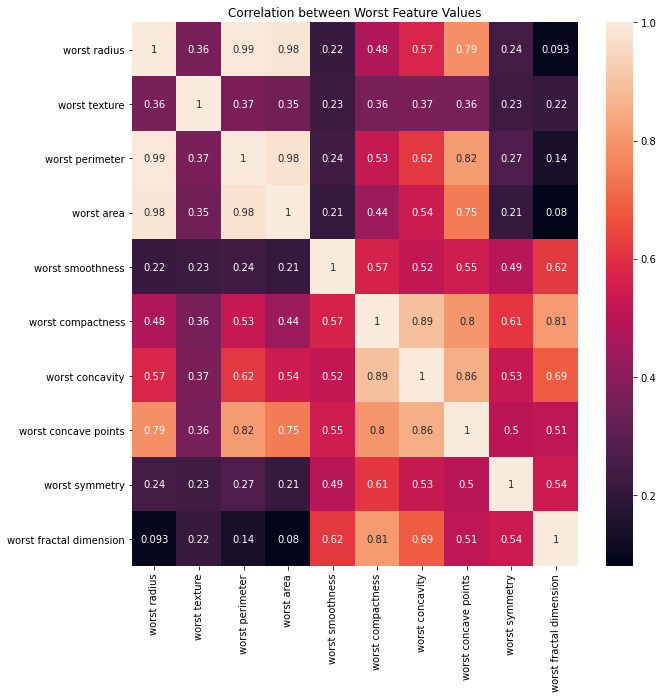

In [ ]:
# heatmap of correlation between worst features
plt.figure(figsize=(10,10))

# TODO: heatmap
# Solution:
sns.heatmap(data=features[features_worst].corr(), annot=True)

plt.title('Correlation between Worst Feature Values');

### Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Question: Set up features and observed labels in training set. Recall we already normalize the `features` matrix, so there's no need to re-do standardization. Use train test split with ratio of 80% - 20%.**

In [ ]:
# set up X and y matrix
features = features.drop('diagnosis', axis=1)
X = features
y = labels

# TODO: train-test split
# Solution:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Question: Now fit your training data to a logistic regression model from the sklearn library. You may find documentation and examples [in this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) helpful.**

In [ ]:
# TODO: fit logistic regression model
# Solution:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

You should be able to know that sklearn solves optimal logistic regression weights using gradient descent in loss function, which you cannot implement here. 

**Question: Now let's simply evaluate our model, using training and test accuracy. Feel free to use built-in functions in sklearn.**

In [ ]:
# TODO: training accuracy of our model
# Solution:
train_accuracy = model.score(X_train, y_train)
print("Training accuracy of logistic regression classifier:", train_accuracy)

Training accuracy of logistic regression classifier: 0.9912087912087912


In [ ]:
# TODO: test accuracy of our model
# Solution:
test_accuracy = model.score(X_test, y_test)
print("Test accuracy of logistic regression classifier:", test_accuracy)

Test accuracy of logistic regression classifier: 0.9736842105263158


It's obvious for you to conclude that our logistic regression classifier does a pretty good job on both training and test sets, with accuracy over 95% in general. But remember we talked about how there are different perspectives to evaluate a machine learning model in classification problem.

### Evaluation of Binary Classifier

#### Confusion Matrix

You should be familiar with the role of confusion matrices in classification problems. 

**Question: Use the sklearn library to report the confusion matrix of your logistic regression classfier and report your observations. A heatmap might be a good choice here. We already import [metrics](https://scikit-learn.org/0.16/modules/classes.html#module-sklearn.metrics) from sklearn for you.**

In [ ]:
from sklearn import metrics

# TODO: find test confusion matrix
# Solution:
test_predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, test_predictions)
cm

array([[41,  2],
       [ 1, 70]])

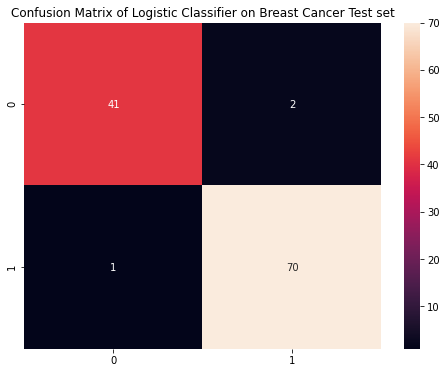

In [ ]:
# visualization of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(data=cm, annot=True)
plt.title("Confusion Matrix of Logistic Classifier on Breast Cancer Test set");

There's only 5 points misclassified from the test set. Half of them coming from either 0 or 1 label. We can only say the classifier performs consistently among two types.

#### Precision, Recall, TPR, and FNR

**Question: Based on the confusion matrix above, compute the FP, TN, FN, TP, precision, recall, TPR, and FPR of our classifier.**



*Solution:*

*Based on confusion matrix, test predictions are breaked down into following categories:*

*   *False Positives (FP): 2*
*   *True Negatives (TN): 35*
*   *False Negatives (FN): 3*
*   *True Positives (TP): 74*

*Evaluate value of precision, recall, TPR, and FNR:*

*   *precision = $\frac {TP} {TP + FP} $ = $\frac {74} {74 + 2}$ = $0.97368421$*
*   *recall = $\frac {TP} {TP + FN} $ = $\frac {74} {74 + 3}$ = $0.96103896$*
*   *TPR = recall = $0.96103896$*
*   *FPR = $\frac {FP} {FP + TN} $ = $\frac {2} {2 + 35}$ = 0.054054*





**Question: Now plot precision vs. recall with respect to each threshold. This is a similar metric to ROC curve that we talked about before. You may find `predict_proba()` function of logistic regression in sklearn useful.**

In [ ]:
# get precision, recall, threshold
from sklearn.metrics import precision_recall_curve

# TODO: get predicted probability of LR, get precision and recall
# Solution:
test_pred_probs = model.predict_proba(X_test)[:, 1]
test_precision, test_recall, thresholds = precision_recall_curve(y_test, test_pred_probs)

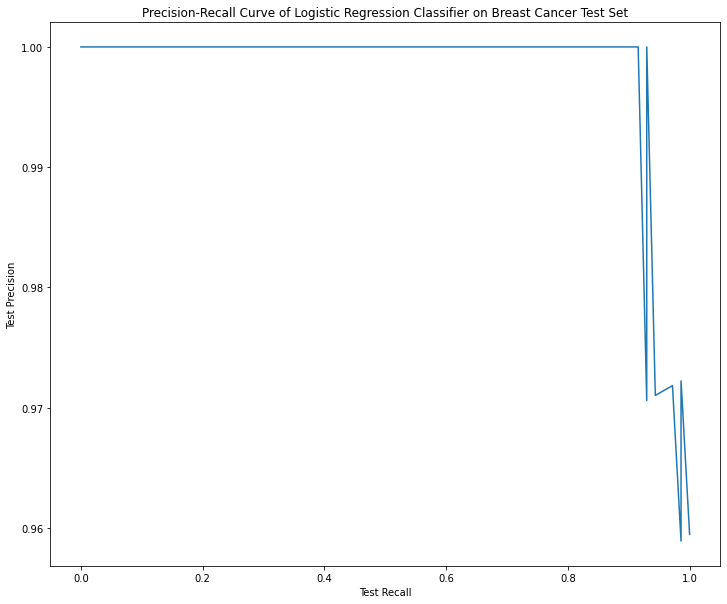

In [ ]:
# plot precision-recall curve
plt.figure(figsize=(12,10))

# TODO: use lineplot for precision-recall curve
#       make sure to add xlabel and ylabel
# Solution:
sns.lineplot(x=test_recall, y=test_precision, ci=None, estimator=None)

plt.xlabel('Test Recall')
plt.ylabel('Test Precision')
plt.title('Precision-Recall Curve of Logistic Regression Classifier on Breast Cancer Test Set');

#### ROC Curve and AUC-ROC

ROC curve is an important metric to evaluate a classification model. Plot the ROC curve of the logistic regression model, and report whether it's good or not based on your observations.

**Question: Plot the ROC curve of the logistic regression model on the test set.** 

To get started, you will need to use the sklearn metrics library to evaluate. Remember logistic regression classifier in sklearn has a method `predict_proba()` that might be useful. You need to use a probabilistic interpretation of the logistic classifier: logistic regression predicts probability of a test point to have label 1. So you only care about the predicted probability of a label 1.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# TODO: get ROC and AUC-ROC probability and score
# Solution:
test_pred_probs = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_pred_probs)
print("AUC of ROC score in test set:", test_auc)

AUC of ROC score in test set: 0.9963969865705863


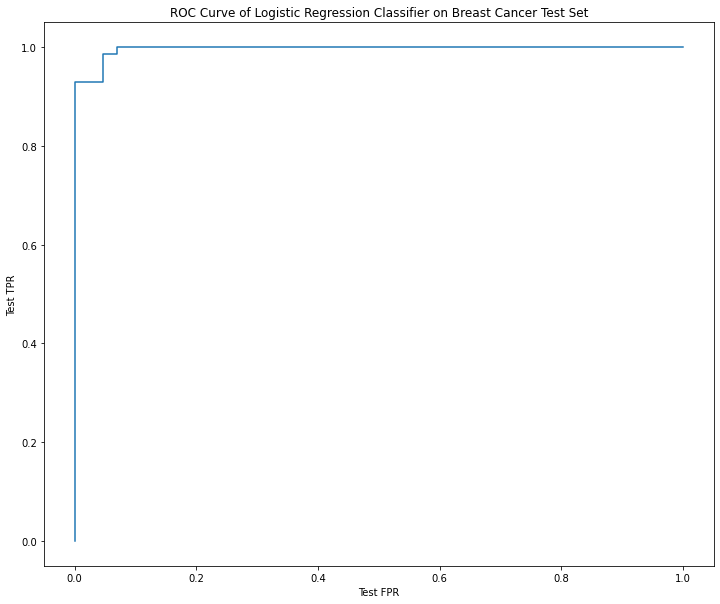

In [ ]:
# plot ROC curve
test_fpr, test_tpr, thresholds = roc_curve(y_test, test_pred_probs)
plt.figure(figsize=(12,10))

# TODO: use lineplot for ROC curve
#       make sure to add xlabel and ylabel
# Solution:
sns.lineplot(x=test_fpr, y=test_tpr, ci=None, estimator=None)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

plt.title('ROC Curve of Logistic Regression Classifier on Breast Cancer Test Set');

**Question: Comment on any similarities and differences between your ROC curve and the precision-recall curve of our classifier. What does this say about the performance of our logistic regression binary classifier?**

*Solution: You can observe that precision-recall curve is almost at the top-right corner of the unit square, and ROC curve is almost at the top-left corner of the unit square. This means our test accuracy is high enough, approximately over 99%. Both curves are consistent with test performance, and therefore suggest robustness and correctness of our logistic regression model on the test set.*

### Stochastic Gradient Descent in sklearn

Now you want to use gradient descent to iteratively approximate the optimal $\hat{\theta}$ by minimizing the cross entropy loss function. Sklearn provides SGDClassifier model that implements stochastic gradient descent on a logistic regression model, by minimizing the cross entropy loss function.

In [ ]:
from sklearn.linear_model import SGDClassifier

**Question: Fit the training set into the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) model. You may want to use custom parameters when you initiate the model, so that it performs classification instead of regression.**

In [ ]:
# construct stochastic gradient descent learning algorithm
sgd_model = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Question: Report the training accuracy and test accuracy of the logistic regression model given by stochastic gradient descent.**

In [ ]:
# TODO: training accuracy of sgd model
# Solution:
sgd_train_accuracy = sgd_model.score(X_train, y_train)
print("Training accuracy of stochastic gradient descent classifier:", sgd_train_accuracy)

Training accuracy of stochastic gradient descent classifier: 0.9736263736263736


In [ ]:
# test accuracy of sgd model
sgd_test_accuracy = sgd_model.score(X_test, y_test)
print("Test accuracy of stochastic gradient descent classifier:", sgd_test_accuracy)

Test accuracy of stochastic gradient descent classifier: 0.9473684210526315


**Question: Print and visualize the confusion matrix of this stochastic gradient descent model.**

In [ ]:
# TODO: print and visualize confusion matrix
# Solution:
sgd_test_predictions = sgd_model.predict(X_test)
sgd_cm = metrics.confusion_matrix(y_test, sgd_test_predictions)
sgd_cm

array([[40,  3],
       [ 3, 68]])

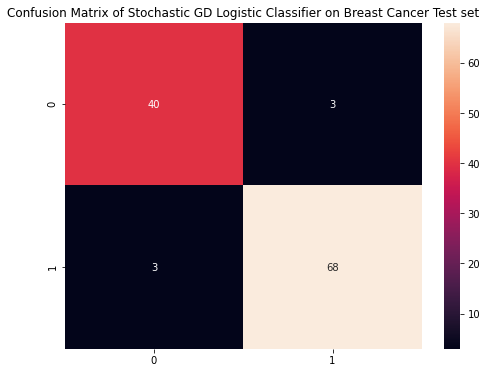

In [ ]:
# visualization of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(data=sgd_cm, annot=True)
plt.title("Confusion Matrix of Stochastic GD Logistic Classifier on Breast Cancer Test set");

**Question: Find the precision and recall values at different thresholds by SGD on the test set. Plot precision vs recall curve as you did for the Logistic Regression model.**

In [ ]:
# TODO: find test predicted probabilities (NOT LABEL VALUES)
#       find precision, recall at different thresholds
# Solution:
sgd_test_pred_probs = sgd_model.predict_proba(X_test)[:, 1]
sgd_test_precision, sgd_test_recall, thresholds = precision_recall_curve(y_test, sgd_test_pred_probs)

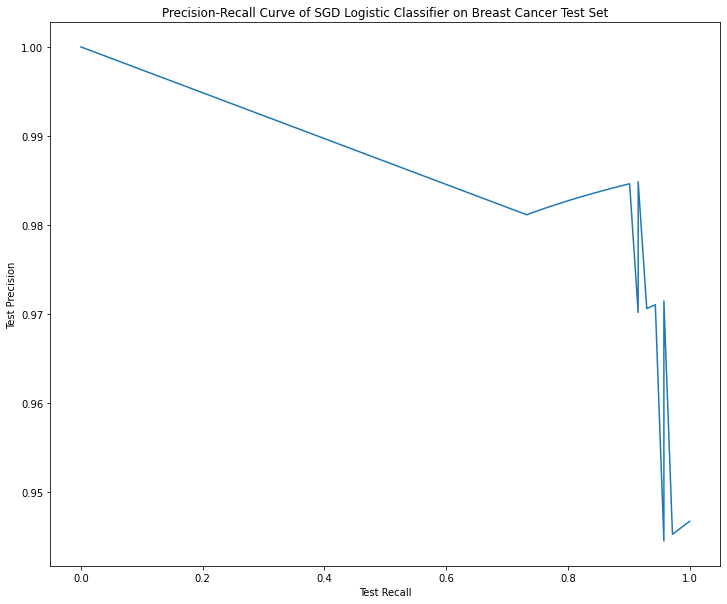

In [ ]:
# plot precision-recall curve
plt.figure(figsize=(12,10))

# TODO: use lineplot for precision vs recall curve
#       make sure to add xlabel and ylabel
# Solution:
sns.lineplot(x=sgd_test_recall, y=sgd_test_precision, ci=None, estimator=None)
plt.xlabel('Test Recall')
plt.ylabel('Test Precision')

plt.title('Precision-Recall Curve of SGD Logistic Classifier on Breast Cancer Test Set');

In [ ]:
# get ROC and AUC-ROC probability and score
sgd_test_pred_probs = sgd_model.predict_proba(X_test)[:, 1]
sgd_test_auc = roc_auc_score(y_test, sgd_test_pred_probs)
print("AUC of ROC score in test set:", test_auc)

AUC of ROC score in test set: 0.9963969865705863


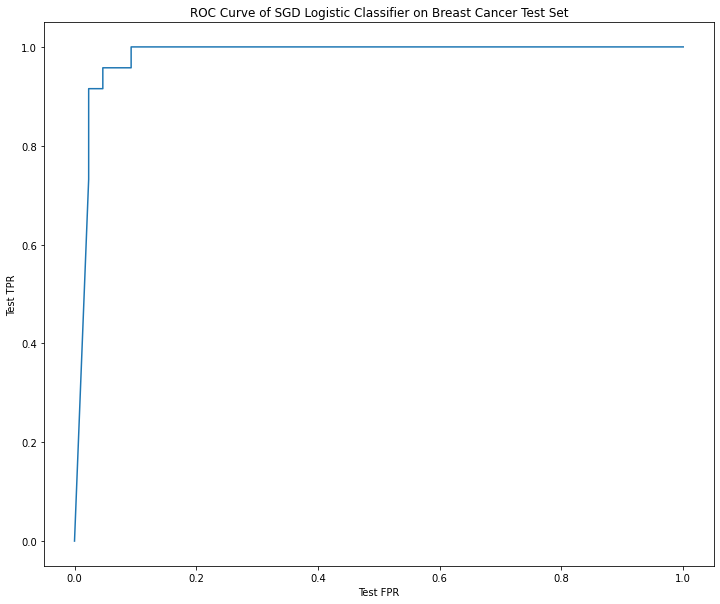

In [ ]:
# plot ROC curve

# TODO: get FPR, TPR at different thresholds
# Solution:
sgd_test_fpr, sgd_test_tpr, thresholds = roc_curve(y_test, sgd_test_pred_probs)

plt.figure(figsize=(12,10))

# TODO: use lineplot for ROC curve
#       make sure to add xlabel and ylabel
# Solution:
sns.lineplot(x=sgd_test_fpr, y=sgd_test_tpr, ci=None, estimator=None)
plt.xlabel('Test FPR')
plt.ylabel('Test TPR')

plt.title('ROC Curve of SGD Logistic Classifier on Breast Cancer Test Set');

**Question: Observe the performance of the logistic regression model trained by stochastic gradient descent. How is it different from the sklearn logistic regression model? Does stochastic gradient descent algorithm give us a higher accuracy? How about the value in the confusion matrix and AUC-ROC? How would you connect your observations to the properties of SGD we discussed last week?**

*Solution:* 

*You should see that accuracy and confusion matrix of logistic regression model given by sklearn library directly, and the one solved by stochastic gradient is approximately the same. So the optimal parameter of logistic regression model can be solved by stochastic gradient descent. They will give a similar decision boundary, thus a similar decision rule if you use stochastic gradient descent to solve for the optimal model parameters over directly fitting into the sklearn logistic regression model. So in practice, stochastic gradient descent is a common way to solve for logistic regression parameters when you don't have access to the sklearn library.*

*But you should also observe that in the precision vs recall curve, the model given by SGD is a little worse then that given by Logistic Regression, since it has a lower curve. This is because, in stochastic gradient descent, sometimes the parameter is a little off while your updates may not always decrease the loss on the training set. So SGD will converge to the Logistic Regression optimal solution, but depending on your stopping criteria, the exact value might be a little off. This manifests as the difference in the precision vs recall curve.*

**Bonus: Change step size $\eta$ in the stochastic gradient descent model you fit. Observe changes in convergence. What's your takeaway if you want to use SGD to solve for optimal parameters in Logistic Regression models?**

Congratulations on finishing this assignment! Hope you get intuition of how logistic regression exactly solves binary classification problems. Hope you understand why we introduce it as the most fundamental model in classification, and as a generalized linear model. You should have gained hands on experience with using sklearn to fit a logistic regression model, and how to evaluate the model from different perspectives.

## References

[1] http://www.ds100.org/sp20/resources/assets/lectures/lec23/part1.html

[2] http://www.ds100.org/sp20/resources/assets/lectures/lec24/LogisticRegressionPart2.html 